**From Insight to Impact: A Data-Driven Playbook for Customer Growth and Retention**

By M Arief Widagdo

---

#1. Introduction

##1.2 Background

In the competitive retail landscape, understanding customer behavior is paramount. A "one-size-fits-all" marketing strategy is inefficient and ineffective. Customer segmentation allows for the precise allocation of resources, enabling personalized marketing, improved customer experiences, and ultimately, increased loyalty and lifetime value. This project aims to transform raw customer data into a clear strategic map for the business.

##1.3 Problem Formulation

As a data analysis team, our objective is to answer the following core business questions:
1. How can we segment our customers into strategically meaningful groups that reflect not just their past value, but their future potential?
2. What are the distinct demographic and behavioral profiles of our most valuable, most at-risk, and most promising customer segments?
3. What specific, data-justified actions can the business take to reduce churn among high-value customers?
4. What are the most effective strategies to increase spending and loyalty among engaged, lower-spending customers?

##1.4 Data Source and Limitation

* Data Source: The analysis utilizes a transactional and demographic dataset of supermarket customers, collected between July 2012 and June 2014. The data was provided by Purwadhika School.
* **Limitations**:
  1. The data is time-bound (2012-2014). Customer behaviors may have shifted since this period. However, the analytical framework and methodologies presented are timeless and can be applied to current data.
  2. Customer age is calculated based on the Year_Birth relative to max year of the last purchase in the dataset, providing a cross-sectional analysis at the time of the data.
  3. Certain external factors (e.g., economic conditions, competitor actions) are not present in the data and are outside the scope of this analysis.

## 1.5 Glossary

| Category | Field | Description |
|---|---|---|
| **People** | ID | Customer's unique identifier |
| | Year_Birth | Customer's birth year |
| | Education | Customer's education level |
| | Marital_Status | Customer's marital status |
| | Income | Customer's yearly household income |
| | Kidhome | Number of children in customer's household |
| | Teenhome | Number of teenagers in customer's household |
| | Dt_Customer | Date of customer's enrollment with the company |
| | Recency | Number of days since customer's last purchase |
| | Complain | 1 if the customer complained in the last 2 years, 0 otherwise |
|---|---|---|
| **Products** | MntWines | Amount spent on wine in the last 2 years |
| | MntFruits | Amount spent on fruits in the last 2 years |
| | MntMeatProducts | Amount spent on meat in the last 2 years |
| | MntFishProducts | Amount spent on fish in the last 2 years |
| | MntSweetProducts | Amount spent on sweets in the last 2 years |
| | MntGoldProds | Amount spent on gold in the last 2 years |
|---|---|---|
| **Promotion** | NumDealsPurchases | Number of purchases made with a discount |
| | AcceptedCmp1 | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise |
| | AcceptedCmp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise |
| | AcceptedCmp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise |
| | AcceptedCmp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise |
| | AcceptedCmp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise |
| | Response | 1 if the customer accepted the offer in the last campaign, 0 otherwise |
|---|---|---|
| **Place** | NumWebPurchases | Number of purchases made through the company's website |
| | NumCatalogPurchases | Number of purchases made using a catalog |
| | NumStorePurchases | Number of purchases made directly in stores |
| | NumWebVisitsMonth | Number of visits to the company's website in the last month |

## 1.6 Libraries used in this Report

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-whitegrid')

#2. Importing and Data Understanding

## 2.1 Importing the Dataframe into Colab

In [ ]:
# Reading the Dataframe
df = pd.read_csv('Supermarket Customers.csv',delimiter='\t')
pd.set_option('display.max_columns', None)
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


## 2.2 Data Understanding

In [ ]:
# Checking data type, na(missing value), unique value for each variables and columns
pd.set_option('display.max_colwidth', None)
print(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
pd.DataFrame(
    {
    'Column Name': df.columns.values,
    'Data Type': df.dtypes.values,
    'Number of Unique': df.nunique().values,
    'Unique Sample': [df[col].unique() for col in df.columns]
    }
)

Total rows 2240, Total Colum 29


,Column Name,Data Type,Number of Unique,Unique Sample
0,ID,int64,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,object,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,int64,3,"[0, 1, 2]"
6,Teenhome,int64,3,"[0, 1, 2]"
7,Dt_Customer,object,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,int64,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,int64,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96

Check if there is 0 value

In [ ]:
#Is there a 0 value data
df.loc[df['ID'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0


Missing Value

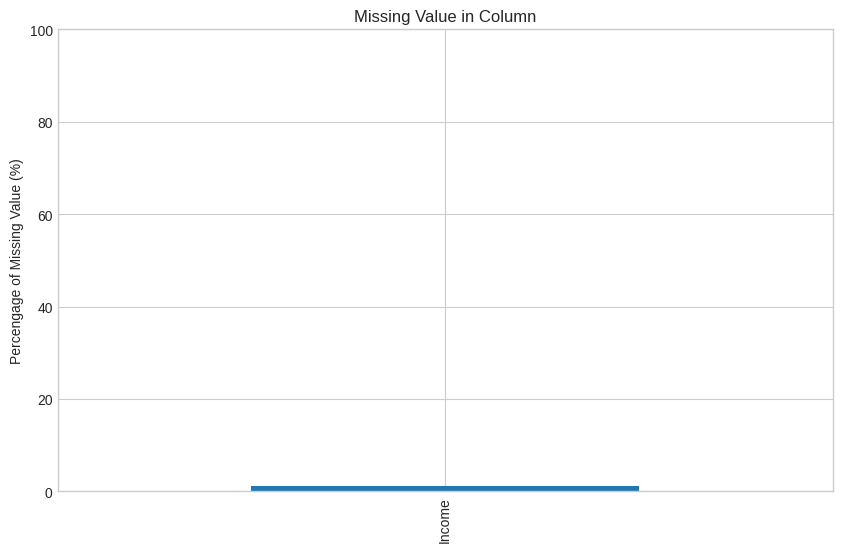

In [ ]:
missing_percentage = df.isnull().sum() / len(df) * 100

# Filter out columns with no missing data to keep the plot clean
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(10, 6))
missing_percentage.sort_values(ascending=False).plot(kind='bar')
plt.title('Missing Value in Column')
plt.ylabel('Percengage of Missing Value (%)')
plt.ylim(0, 100)
plt.show()

No Salary (N/A)

In [ ]:
len(df[df['Income'].isna()])

24

Income Missing Data

In [ ]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Percentage of Missing Value

In [ ]:
#Persentage of Missing value
df.isna().sum()/df.shape[0]*100

,0
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000


Missing Values

<Axes: >

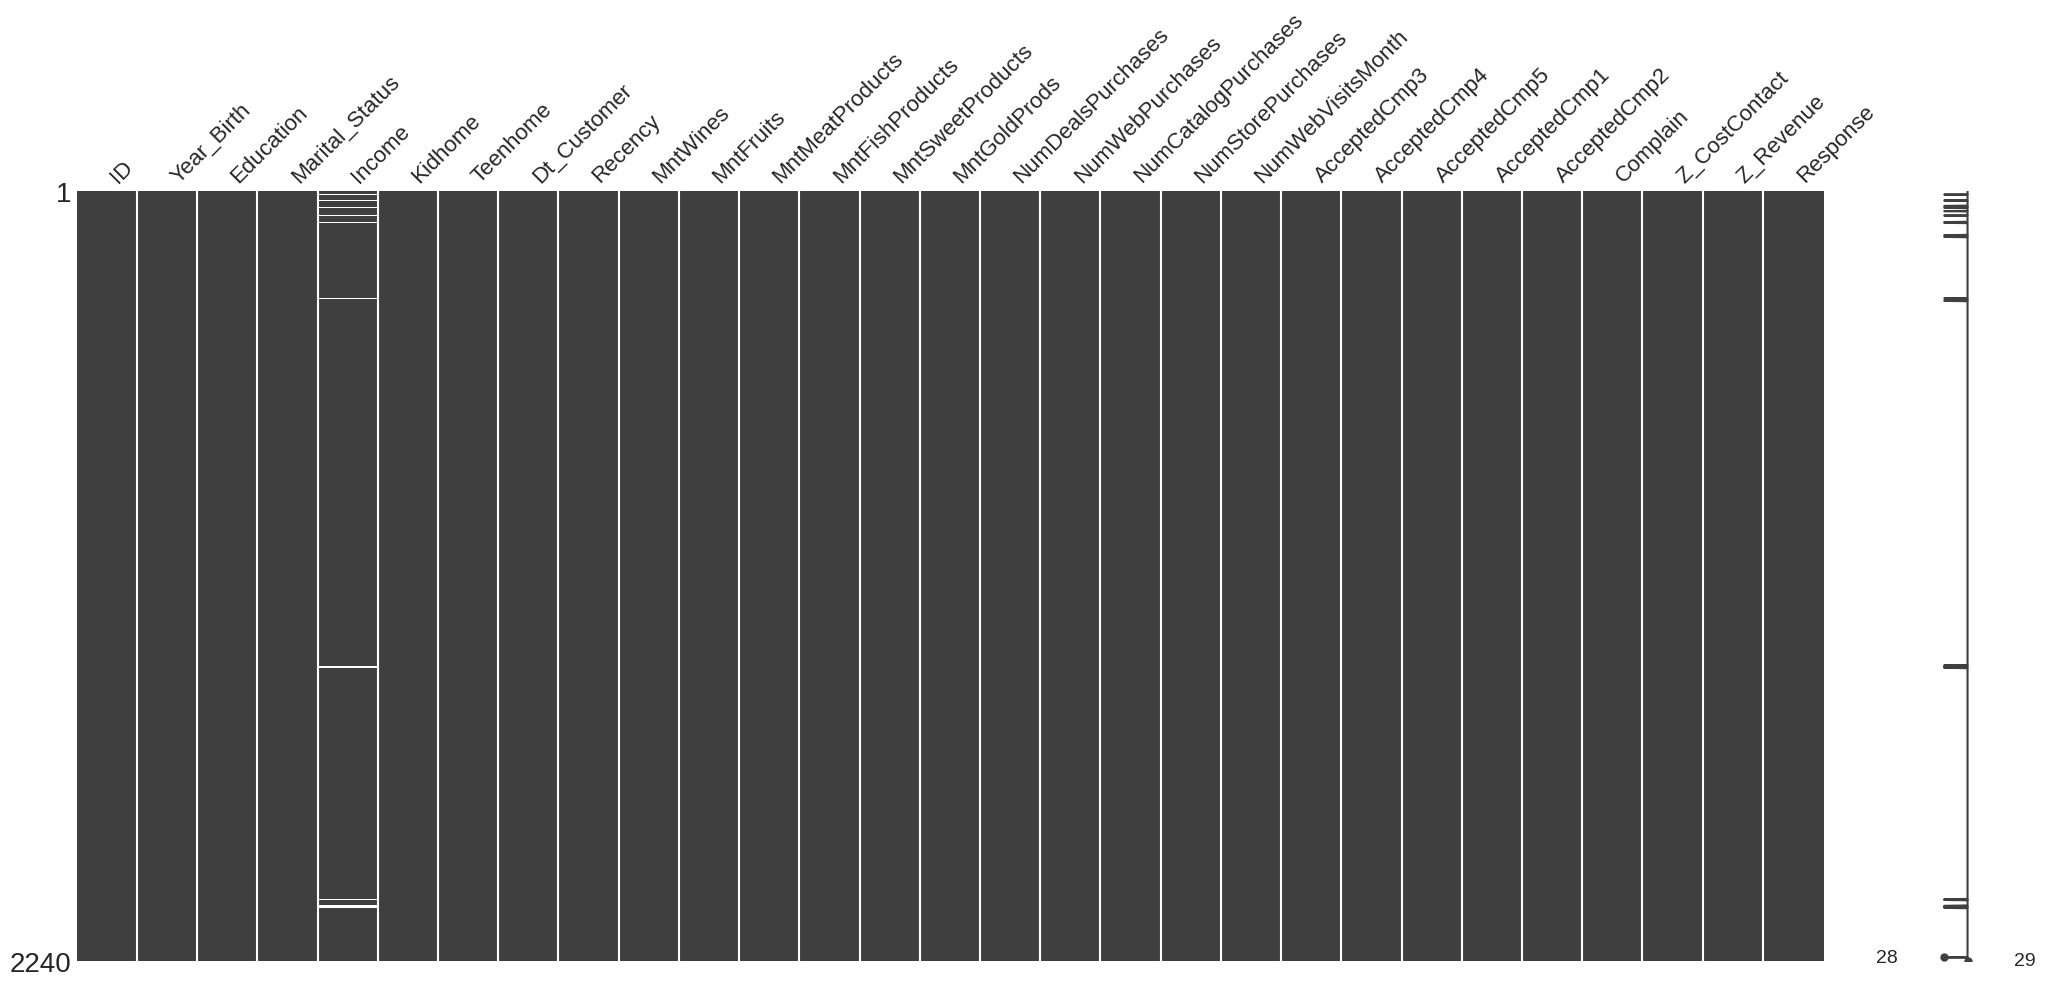

In [ ]:
missingno.matrix(df)

## Data Distribustion

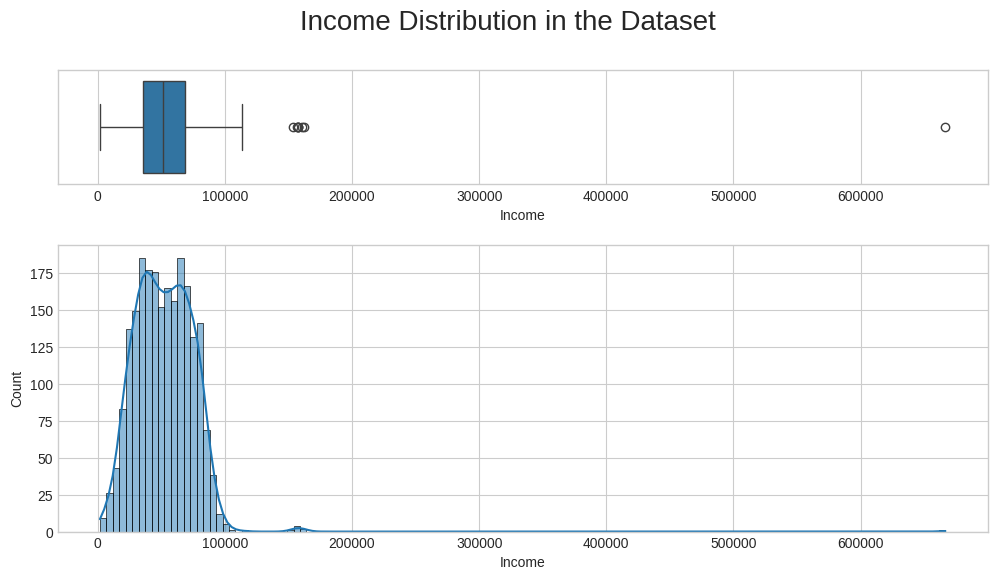

In [ ]:
#Data Distribution
grid = {
    'height_ratios' : (4,10),
    'hspace' : 0.3}

fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=df, x='Income',ax=axes1)
sns.histplot(data=df, x='Income', ax=axes2,kde=True)

fig.suptitle('Income Distribution in the Dataset', size = 20)
plt.show()

An initial glance at this boxplot and historgram show that there is one data that is an extreme outlier, this data should be dropped during the cleaning of the data

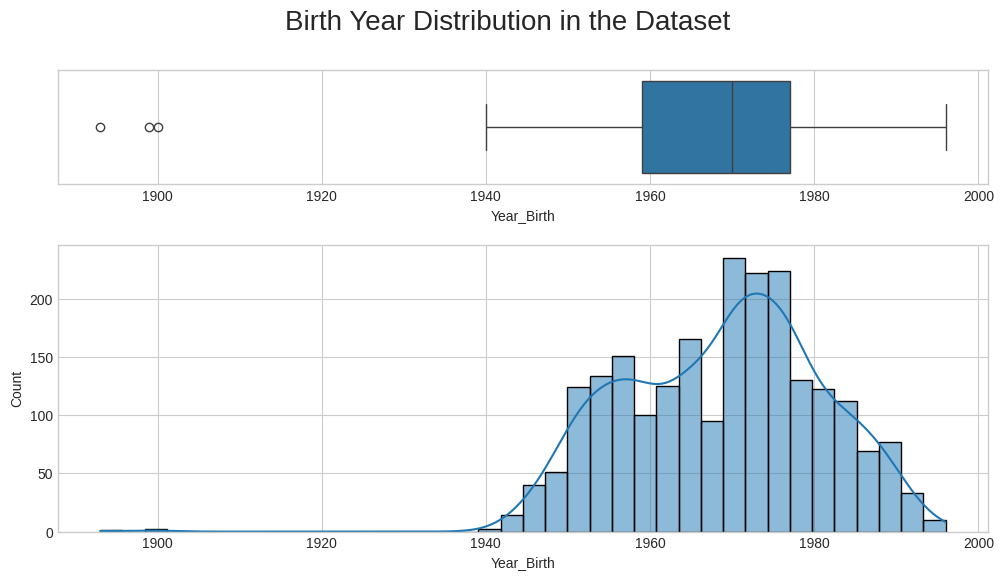

In [ ]:
#Data Distribution
grid = {
    'height_ratios' : (4,10),
    'hspace' : 0.3}

fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=df, x='Year_Birth',ax=axes1)
sns.histplot(data=df, x='Year_Birth', ax=axes2,kde=True)

fig.suptitle('Birth Year Distribution in the Dataset', size = 20)
plt.show()

Numerical Data Description

In [ ]:
# Numerical only
numerik = df.select_dtypes(include='number')
pd.set_option('display.max_columns', None)
numerik

pd.set_option('display.max_columns', None)
display(numerik.describe())

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Distribution for Numeric Data

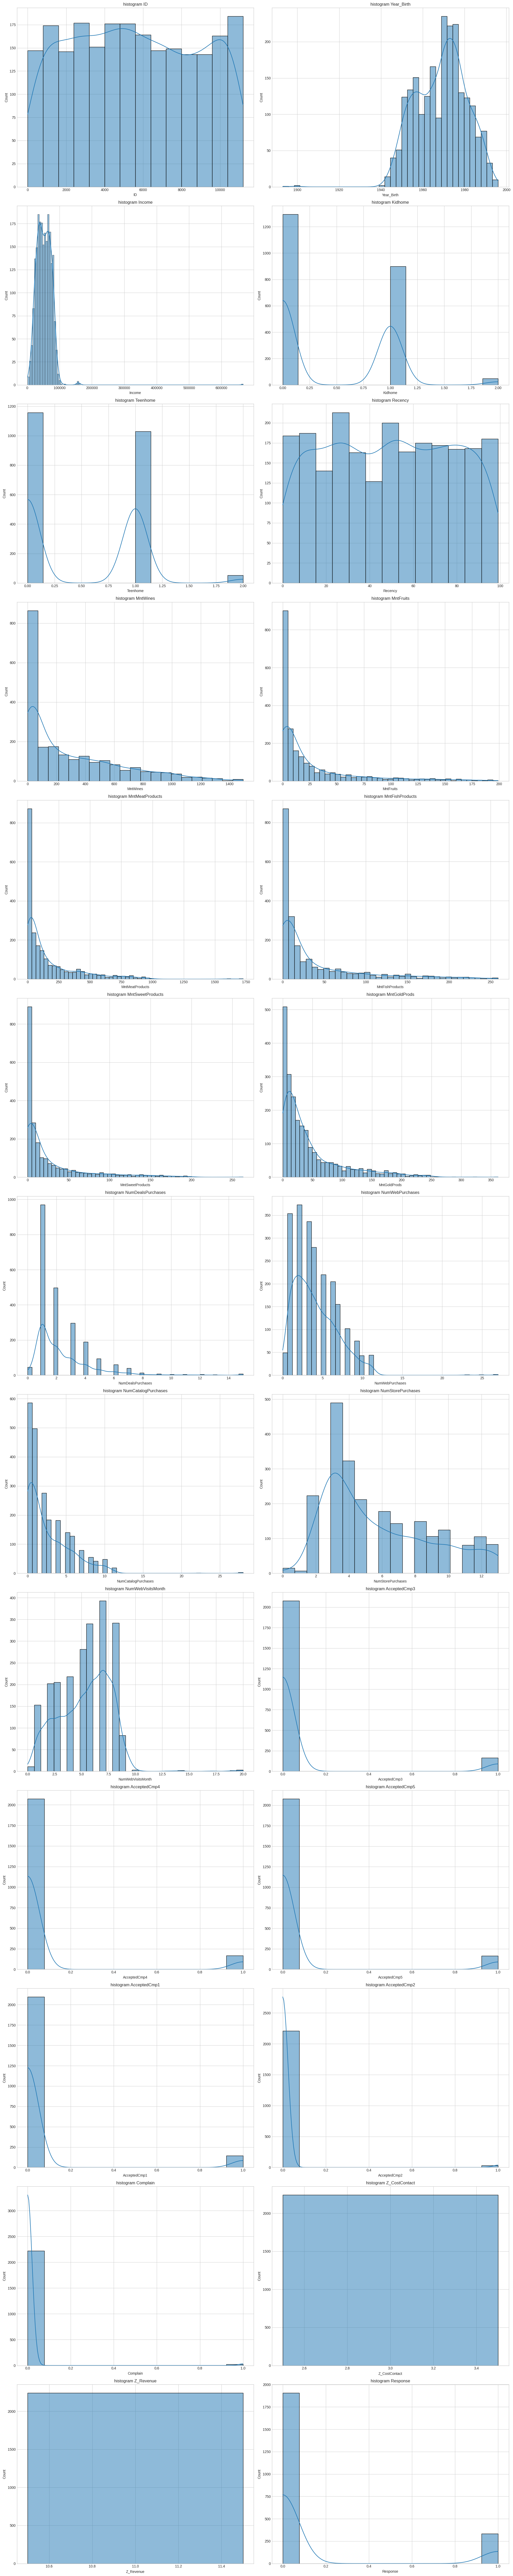

In [ ]:
# Data Distribution for Numeric Data
fig = plt.figure(figsize=(20,100))

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(13,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout()
plt.show()

Looking at this data, we can also see that Year_birth has outliers data that does not make sense (People born <1900), just like the income this data should be dropped during data cleaning as its messing the dataset

Outliers

In [ ]:
#Check outliers using IQR

# Loop each numeric column
for kolom in numerik.columns:
    q1 = numerik[kolom].quantile(0.25)
    q3 = numerik[kolom].quantile(0.75)
    iqr = q3 - q1

    # Definisikan boundaries
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Cari outliers
    outliers = numerik[(numerik[kolom] < lower_bound) | (numerik[kolom] > upper_bound)]

    # print
    if not outliers.empty:
        print(f"\nOutliers in {kolom}'")
        # Print the outlier values for that specific column
        print(outliers[kolom])
    else:
        print(f"\nThere are no outliers in '{kolom}' ")


There are no outliers in 'ID' 

Outliers in Year_Birth'
192    1900
239    1893
339    1899
Name: Year_Birth, dtype: int64

Outliers in Income'
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

There are no outliers in 'Kidhome' 

There are no outliers in 'Teenhome' 

There are no outliers in 'Recency' 

Outliers in MntWines'
111     1332
161     1349
295     1241
424     1285
430     1248
466     1239
497     1396
515     1288
523     1379
543     1478
559     1492
824     1492
826     1279
870     1308
917     1478
937     1253
987     1394
990     1296
1001    1285
1010    1230
1052    1315
1191    1298
1458    1302
1488    1449
1492    1259
1577    1252
1641    1459
1749    1493
1922    1324
1953    1285
1961    1462
1992    1276
2067    1245
2098    1486
2127    1311
Name: MntWines, dtype: int64

Outliers in MntFruits'
0        88
29      100
45      164
53      120

Total Numbers of Outliers

In [ ]:
for kolom in numerik.columns:
  q1 = numerik[[kolom]].quantile(0.25)
  q3 = numerik[[kolom]].quantile(0.75)
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)

  total_outliers = len(numerik[(numerik[kolom] < lower_bound) | (numerik[kolom] > upper_bound)])
  print(f"\n'{kolom}' has {total_outliers} outliers")


'ID' has 0 outliers

'Year_Birth' has 3 outliers

'Income' has 8 outliers

'Kidhome' has 0 outliers

'Teenhome' has 0 outliers

'Recency' has 0 outliers

'MntWines' has 35 outliers

'MntFruits' has 227 outliers

'MntMeatProducts' has 175 outliers

'MntFishProducts' has 223 outliers

'MntSweetProducts' has 248 outliers

'MntGoldProds' has 207 outliers

'NumDealsPurchases' has 86 outliers

'NumWebPurchases' has 4 outliers

'NumCatalogPurchases' has 23 outliers

'NumStorePurchases' has 0 outliers

'NumWebVisitsMonth' has 8 outliers

'AcceptedCmp3' has 163 outliers

'AcceptedCmp4' has 167 outliers

'AcceptedCmp5' has 163 outliers

'AcceptedCmp1' has 144 outliers

'AcceptedCmp2' has 30 outliers

'Complain' has 21 outliers

'Z_CostContact' has 0 outliers

'Z_Revenue' has 0 outliers

'Response' has 334 outliers


Data Distribution

In [ ]:
#Check for Income

In [ ]:
numerik.dropna(inplace = True)
numerik.isna().sum()
stat, pvalue = shapiro(numerik['Income'])
pvalue


np.float64(8.245966075905429e-48)

Data for Income is not Normal <0.05

Check other data distribution

In [ ]:
listpvalue = []
listStatusNormal = []
listKolom = ['Income','Year_Birth','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain']
for i in listKolom :
    stat,pvalue=shapiro(numerik[i])
    if pvalue<=0.05:
        status = 'Not Normal'
    else:
        status = 'Normal'
    listpvalue.append(pvalue)
    listStatusNormal.append(status)

In [ ]:
NDistribusi = pd.DataFrame({
    'Column' : listKolom,
    'Data Distribution' : listStatusNormal,
    'P-Value' : listpvalue
})
NDistribusi

,Column,Data Distribution,P-Value
0,Income,Not Normal,8.245966e-48
1,Year_Birth,Not Normal,4.832115e-19
2,Recency,Not Normal,8.729881e-26
3,MntWines,Not Normal,1.000436e-42
4,MntFruits,Not Normal,2.668172e-53
5,MntMeatProducts,Not Normal,1.018651e-50
6,MntFishProducts,Not Normal,3.235253e-52
7,MntSweetProducts,Not Normal,2.253405e-53
8,MntGoldProds,Not Normal,2.415729e-48
9,NumDealsPurchases,Not Normal,2.659397e-50


#3. Initial Data Understanding and Cleaning

A clean dataset is the foundation of any reliable analysis. In this section, we will methodically address inconsistencies, errors, and missing values to prepare the data for feature engineering and analysis.

##3.1 Irrelevant data

* Irrelevant Columns: Z_CostContact and Z_Revenue are constant across (3 and 11) all columns with no variance and provide no analytical value. They must be dropped.
* Incorrect Data Type: Dt_Customer is stored as an object (string) and must be converted to a datetime object to enable time-based calculations.
* Inconsistent Categorical Data: Marital_Status and Education contain ambiguous or redundant values ("YOLO", "2n Cycle") that need to be standardized.
* Missing Values: The Income column has 24 missing values that need to be handled.
* Remove the 66666 values in Income
* Potential Outliers: The Year_Birth column has a minimum value of 1893, which is highly improbable, unless they are vampire, and likely a data entry error. This needs to be investigated and cleaned.

## 3.2 Drop Irrelevant Columns

In [ ]:
# Use nunique() to count the number of distinct values in each column
unique_counts = df[['Z_CostContact', 'Z_Revenue']].nunique()

print(unique_counts)

Z_CostContact    1
Z_Revenue        1
dtype: int64


Both columns only have 1 data inside it, therefore they have no variance and will have zero effect on our analysis, they should be dropped immediately

In [ ]:
if not df.empty:
    df_cleaned = df.copy() # Create a copy to preserve the original raw data
    df_cleaned.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
    print("Dropped 'Z_CostContact' and 'Z_Revenue'. New shape:", df_cleaned.shape)

Dropped 'Z_CostContact' and 'Z_Revenue'. New shape: (2240, 27)


Correcting Date Type

We will then convert date from string to date time for analysis

In [ ]:
if 'Dt_Customer' in df_cleaned.columns:
    df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'], format='%d-%m-%Y')
    print("Change data type of 'Dt_Customer' converted to:", df_cleaned['Dt_Customer'].dtype)

Change data type of 'Dt_Customer' converted to: datetime64[ns]


Standardizing Categorical Variables

In [ ]:
if 'Marital_Status' in df_cleaned.columns and 'Education' in df_cleaned.columns:
    # Consolidate Marital Status
    marital_map = {
        'Married': 'Partnered', 'Together': 'Partnered',
        'Single': 'Single', 'Divorced': 'Single', 'Widow': 'Single',
        'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'
    }
    df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].map(marital_map)

    # Standardize Education levels
    education_map = {
        'Graduation': 'Bachelor', '2n Cycle': 'Master', 'Basic': 'High School'
    }
    df_cleaned['Education'] = df_cleaned['Education'].replace(education_map)

    print("--- 'Marital_Status' Value Counts After Cleaning ---")
    print(df_cleaned['Marital_Status'].value_counts())
    print("\n--- 'Education' Value Counts After Cleaning ---")
    print(df_cleaned['Education'].value_counts())

--- 'Marital_Status' Value Counts After Cleaning ---
Marital_Status
Partnered    1444
Single        796
Name: count, dtype: int64

--- 'Education' Value Counts After Cleaning ---
Education
Bachelor       1127
Master          573
PhD             486
High School      54
Name: count, dtype: int64


##3.3 Handling Outliers

Remove Year Birth Outliers

In [ ]:
if 'Year_Birth' in df_cleaned.columns:
    initial_rows = len(df_cleaned)
    df_cleaned = df_cleaned[df_cleaned['Year_Birth'] >= 1901].copy()
    rows_removed = initial_rows - len(df_cleaned)
    print(f"Removed {rows_removed} rows with illogical 'Year_Birth' (< 1901).")

Removed 3 rows with illogical 'Year_Birth' (< 1901).


Remove Income Outliers

Since this person has an average income of more than 13x its education group(A good correlation indication of their income), this data should be safe to remove

In [ ]:
if 'Income' in df_cleaned.columns:
    initial_rows = len(df_cleaned)
    df_cleaned = df_cleaned[df_cleaned['Income'] != 666666.0].copy()
    rows_removed = initial_rows - len(df_cleaned)
    print(f"Removed {rows_removed} row(s) with the illogical 'Income' value of 666666.0.")

Removed 1 row(s) with the illogical 'Income' value of 666666.0.


##3.4 Handle Missing Data

In this section, we group the missing values by their "Education' data since it reflect the real life counterpart (Education as predictor of someones income level) and use the median data of their education income group

In [ ]:
if 'Income' in df_cleaned.columns:
    print(f"Missing 'Income' values before imputation: {df_cleaned['Income'].isnull().sum()}")

    # Impute using the median of the education group
    df_cleaned['Income'] = df_cleaned.groupby('Education')['Income'].transform(lambda x: x.fillna(x.median()))

    # In the rare case that an entire education group had no income data, a NaN could remain. Drop it.
    df_cleaned.dropna(subset=['Income'], inplace=True)

    print(f"Missing 'Income' values after imputation: {df_cleaned['Income'].isnull().sum()}")

Missing 'Income' values before imputation: 24
Missing 'Income' values after imputation: 0


##3.5 Summary and Housekeeping

The new shape of the data after doing the cleaning

In [ ]:
df_cleaned.reset_index(drop=True, inplace=True)
df_processed = df_cleaned.copy()

print(f"Final processed dataset contains {df_processed.shape[0]} rows and {df_processed.shape[1]} columns.")

Final processed dataset contains 2236 rows and 27 columns.


#4. Feature Engineering

In this seciton we will add additional column to make our analysis easier and reflect our understanding of the data. We will add age column, family size (based on the teenhome and kidhome) and is_parent (It would be logical for family to have parent)

##4.1 Customer Persona

We add several new columns such as Age(Last Max Year Purchase-2014)-Year_birth since it will reflect the time this data was taken and **NOT** the current day (2025) since we have a large gap of year (>12 years) that would bifurcate our analysis

In [ ]:
print("Engineering Customer Persona Features...")

# Determine the 'present year' based on the latest date in the dataset
latest_year = df_processed['Dt_Customer'].max().year

# Calculate Age relative to the data's timeframe
df_processed['Age'] = latest_year - df_processed['Year_Birth']

# Calculate total family size based on children and teens
# only uses Kidhome and Teenhome.
df_processed['Family_Size'] = df_processed['Kidhome'] + df_processed['Teenhome']

# Create a binary flag for parenthood instead of Boolean
df_processed['Is_Parent'] = (df_processed['Family_Size'] > 0).astype(int)

print("Added New Segment: 'Age', 'Family_Size', 'Is_Parent'")
display(df_processed[['ID', 'Year_Birth', 'Age', 'Kidhome', 'Teenhome', 'Family_Size', 'Is_Parent']].head())

Engineering Customer Persona Features...
Added New Segment: 'Age', 'Family_Size', 'Is_Parent'


,ID,Year_Birth,Age,Kidhome,Teenhome,Family_Size,Is_Parent
0,5524,1957,57,0,0,0,0
1,2174,1954,60,1,1,2,1
2,4141,1965,49,0,0,0,0
3,6182,1984,30,1,0,1,1
4,5324,1981,33,1,0,1,1


##4.2 Customer  Value Features

In preparation for the RFM analysis, we will also add columns to reflect their Tenure (From the day they sign up), Monetary (All of their total purchase), and Frequency (How often they buy, based on the channel (Web, Catalog and Store)- they buy)

In [ ]:
if not df_processed.empty:
    print("Engineering Customer Value Features")

    # Calculate customer tenure in days
    df_processed['Customer_Tenure'] = (df_processed['Dt_Customer'].max() - df_processed['Dt_Customer']).dt.days

    # Calculate total monetary spend
    mnt_cols = [col for col in df_processed.columns if col.startswith('Mnt')]
    df_processed['Monetary'] = df_processed[mnt_cols].sum(axis=1)

    # Calculate total purchase frequency
    purchase_cols = [col for col in df_processed.columns if 'Num' in col and 'Purchases' in col]
    df_processed['Frequency'] = df_processed[purchase_cols].sum(axis=1)

    print("Successfully created: 'Customer_Tenure', 'Monetary', 'Frequency'")
    display(df_processed[['ID', 'Customer_Tenure', 'Monetary', 'Frequency']].head())

Engineering Customer Value Features
Successfully created: 'Customer_Tenure', 'Monetary', 'Frequency'


,ID,Customer_Tenure,Monetary,Frequency
0,5524,663,1617,25
1,2174,113,27,6
2,4141,312,776,21
3,6182,139,53,8
4,5324,161,422,19


##4.3 Behaviour

In this section we dive deeper into the customer's behaviour by highlighting their Average Basket Value or total transaction each time they do transaction. We will use Premium_Wine_Ratio as a proxy of premium high end category as it also how Supermarket in real world derived a chunk of their profit from this category. The assumption would be that the more premium customer will spend more on this category compared to other category

In [ ]:
if not df_processed.empty:


    # we replace 0 with 1 (as these customers have non-zero monetary, a freq of 0 is an anomaly)
    safe_frequency = df_processed['Frequency'].replace(0, 1)
    safe_monetary = df_processed['Monetary'].replace(0, 1)

    # Calculate average spend per transaction
    df_processed['Avg_Basket_Value'] = df_processed['Monetary'] / safe_frequency

    # Calculate the proportion of spending on wine
    df_processed['Premium_Wine_Ratio'] = df_processed['MntWines'] / safe_monetary

    # Calculate the proportion of purchases made online
    df_processed['Web_Purchase_Ratio'] = df_processed['NumWebPurchases'] / safe_frequency

    display(df_processed[['ID', 'Avg_Basket_Value', 'Premium_Wine_Ratio', 'Web_Purchase_Ratio']].head())

,ID,Avg_Basket_Value,Premium_Wine_Ratio,Web_Purchase_Ratio
0,5524,64.680000,0.392703,0.320000
1,2174,4.500000,0.407407,0.166667
2,4141,36.952381,0.548969,0.380952
3,6182,6.625000,0.207547,0.250000
4,5324,22.210526,0.409953,0.263158


#5. Exploratory Data Analysis

##5.1 Univariate

Univariate Analysis of Key Customer Metrics


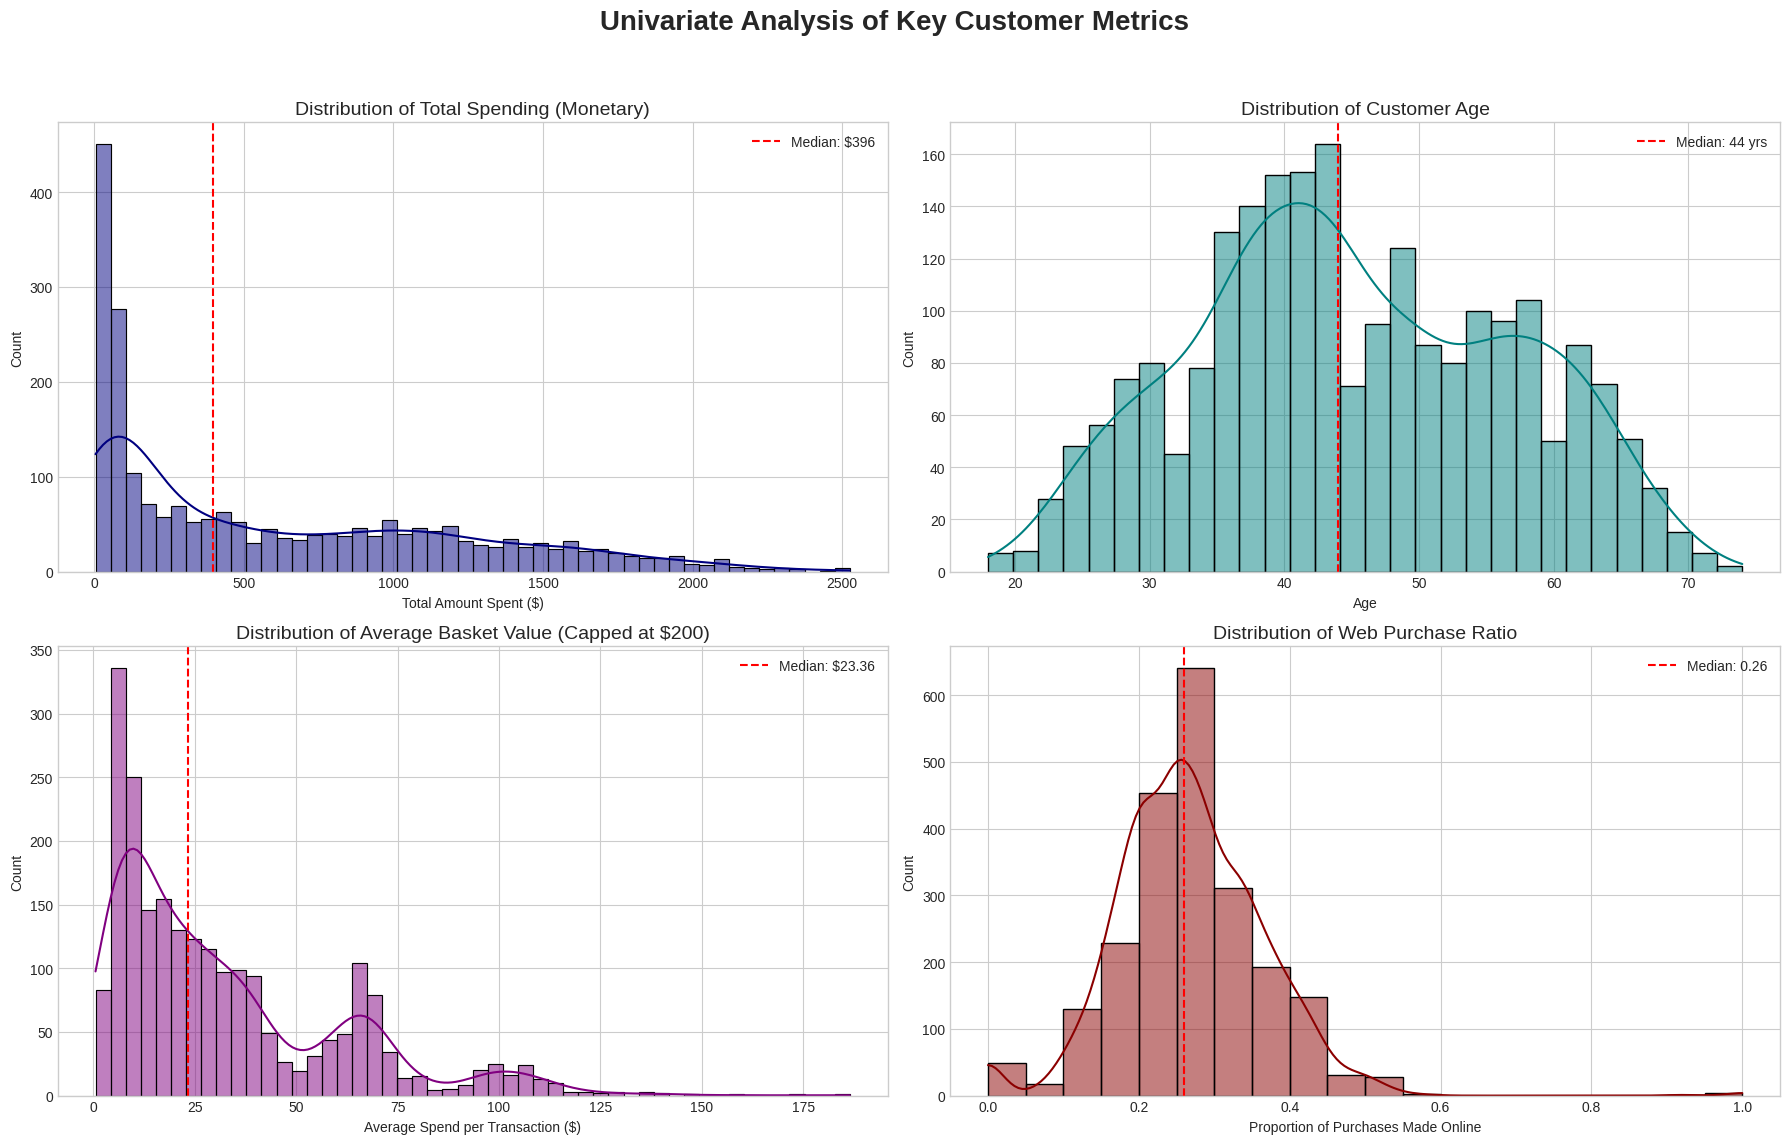

In [ ]:
if not df_processed.empty:
    print("Univariate Analysis of Key Customer Metrics")

    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Univariate Analysis of Key Customer Metrics', fontsize=20, weight='bold')

    # Plot 1: Monetary
    sns.histplot(df_processed['Monetary'], kde=True, ax=axes[0, 0], color='navy', bins=50)
    axes[0, 0].set_title('Distribution of Total Spending (Monetary)', fontsize=14)
    axes[0, 0].set_xlabel('Total Amount Spent ($)')
    axes[0, 0].axvline(df_processed['Monetary'].median(), color='red', linestyle='--', label=f"Median: ${df_processed['Monetary'].median():.0f}")
    axes[0, 0].legend()

    # Plot 2: Age
    sns.histplot(df_processed['Age'], kde=True, ax=axes[0, 1], color='teal', bins=30)
    axes[0, 1].set_title('Distribution of Customer Age', fontsize=14)
    axes[0, 1].set_xlabel('Age')
    axes[0, 1].axvline(df_processed['Age'].median(), color='red', linestyle='--', label=f"Median: {df_processed['Age'].median():.0f} yrs")
    axes[0, 1].legend()

    # Plot 3: Avg Basket Value
    sns.histplot(df_processed[df_processed['Avg_Basket_Value']<200]['Avg_Basket_Value'], kde=True, ax=axes[1, 0], color='purple', bins=50)
    axes[1, 0].set_title('Distribution of Average Basket Value (Capped at $200)', fontsize=14)
    axes[1, 0].set_xlabel('Average Spend per Transaction ($)')
    axes[1, 0].axvline(df_processed['Avg_Basket_Value'].median(), color='red', linestyle='--', label=f"Median: ${df_processed['Avg_Basket_Value'].median():.2f}")
    axes[1, 0].legend()

    # Plot 4: Web Purchase Ratio
    sns.histplot(df_processed['Web_Purchase_Ratio'], kde=True, ax=axes[1, 1], color='darkred', bins=20)
    axes[1, 1].set_title('Distribution of Web Purchase Ratio', fontsize=14)
    axes[1, 1].set_xlabel('Proportion of Purchases Made Online')
    axes[1, 1].axvline(df_processed['Web_Purchase_Ratio'].median(), color='red', linestyle='--', label=f"Median: {df_processed['Web_Purchase_Ratio'].median():.2f}")
    axes[1, 1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



1.  **Monetary:** The distribution is heavily right-skewed, confirming the Pareto principle in our customer base: a small fraction of customers contributes a disproportionately large amount of revenue. This strongly justifies the need for a value-based segmentation approach.
2.  **Age:** The customer base is mature, with a median age of 44, with primary cohorts in the Gen X and Baby Boomer age ranges. This suggests our marketing should not be solely focused on younger demographics.
3.  **Average Basket Value:** This is also right-skewed. The median customer spends about $23 per transaction, but there is a long tail of customers making much larger purchases. Understanding what drives these high-value transactions will be key.
4.  **Web Purchase Ratio:** The distribution shows two peaks. A significant group of customers makes almost no online purchases (ratio near 0), while another large group makes a moderate portion (20-40%) of their purchases online. There are very few "online-only" customers. This suggests an omnichannel strategy is essential, and there is a major opportunity to convert the offline-only group.

##5.2 Bivariate Analysis

Understanding Key Relationships in the Data


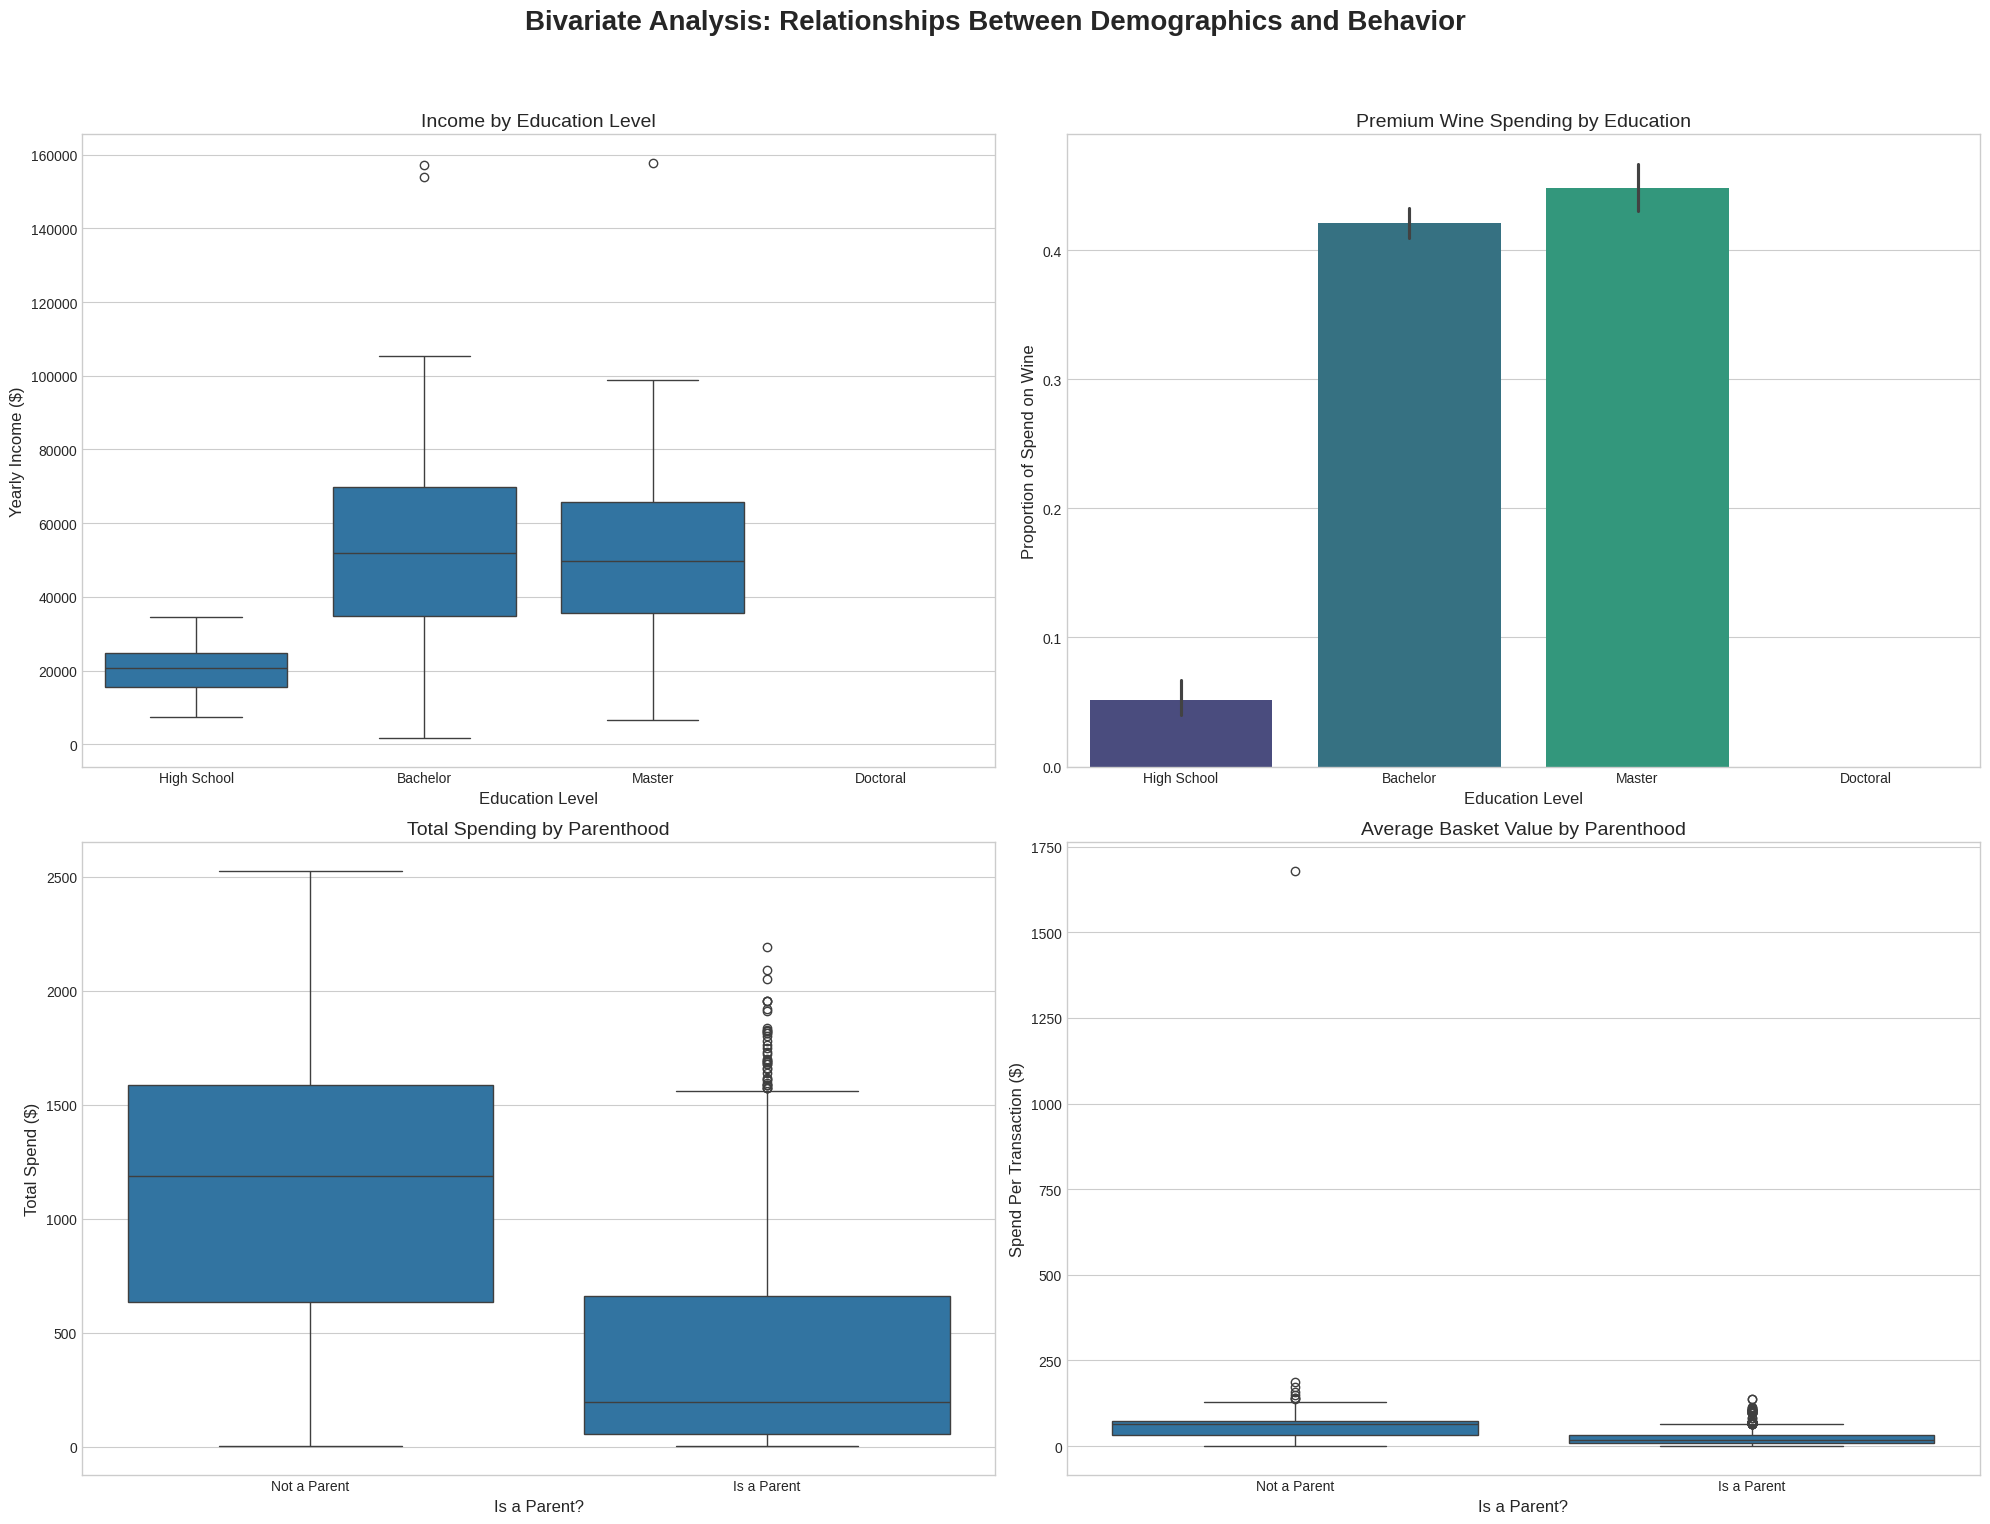

In [ ]:
if not df_processed.empty:
    print("Understanding Key Relationships in the Data")

    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Bivariate Analysis: Relationships Between Demographics and Behavior', fontsize=20, weight='bold')

    # Plot 1: Income vs Education
    sns.boxplot(data=df_processed, x='Education', y='Income', ax=axes[0, 0], order=['High School', 'Bachelor', 'Master', 'Doctoral'])
    axes[0, 0].set_title('Income by Education Level', fontsize=14)
    axes[0, 0].set_xlabel('Education Level', fontsize=12)
    axes[0, 0].set_ylabel('Yearly Income ($)', fontsize=12)

    # Plot 2: Premium Wine Ratio vs Education
    sns.barplot(data=df_processed, x='Education', y='Premium_Wine_Ratio', ax=axes[0, 1], order=['High School', 'Bachelor', 'Master', 'Doctoral'], palette='viridis')
    axes[0, 1].set_title('Premium Wine Spending by Education', fontsize=14)
    axes[0, 1].set_xlabel('Education Level', fontsize=12)
    axes[0, 1].set_ylabel('Proportion of Spend on Wine', fontsize=12)

    # Plot 3: Monetary vs Parenthood
    sns.boxplot(data=df_processed, x='Is_Parent', y='Monetary', ax=axes[1, 0])
    axes[1, 0].set_title('Total Spending by Parenthood', fontsize=14)
    axes[1, 0].set_xlabel('Is a Parent?', fontsize=12)
    axes[1, 0].set_xticklabels(['Not a Parent', 'Is a Parent'])
    axes[1, 0].set_ylabel('Total Spend ($)', fontsize=12)

    # Plot 4: Avg Basket Value vs Parenthood
    sns.boxplot(data=df_processed, x='Is_Parent', y='Avg_Basket_Value', ax=axes[1, 1])
    axes[1, 1].set_title('Average Basket Value by Parenthood', fontsize=14)
    axes[1, 1].set_xlabel('Is a Parent?', fontsize=12)
    axes[1, 1].set_xticklabels(['Not a Parent', 'Is a Parent'])
    axes[1, 1].set_ylabel('Spend Per Transaction ($)', fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**Key Relationships Discovered:**

1. **Education's Dual Impact:** As expected, higher education levels correlate strongly with higher median income. More interestingly, higher education also correlates with a significantly higher `Premium_Wine_Ratio`. Customers with Master's and Doctoral degrees dedicate a larger share of their budget to wine, marking them as a key target for premium product marketing.
2. **The "Parenthood Penalty":** Having children (of any age) has a dramatic negative correlation with total spending. The median spend for non-parents is substantially higher than for parents. This is a critical finding. While parents may be a large group, non-parents are a more lucrative one on a per-customer basis.
3. **Transaction Size vs. Parenthood:** The `Avg_Basket_Value` is also higher for non-parents. This contradicts the potential assumption that parents would be doing larger "family shops." Instead, it suggests that non-parents have more disposable income to spend on higher-value items per trip.

##5.3 Correlation Analysis

As a final step before segmentation, a heatmap provides a quick visual summary of the linear relationships between our key numerical features. This helps us confirm expected relationships (e.g., Monetary and Frequency should be correlated) and spot any unexpected ones. We will use the 'spearman' method as it is robust to non-normally distributed data, which we have already identified in our dataset.

Correlation Matrix of Key Numerical Features


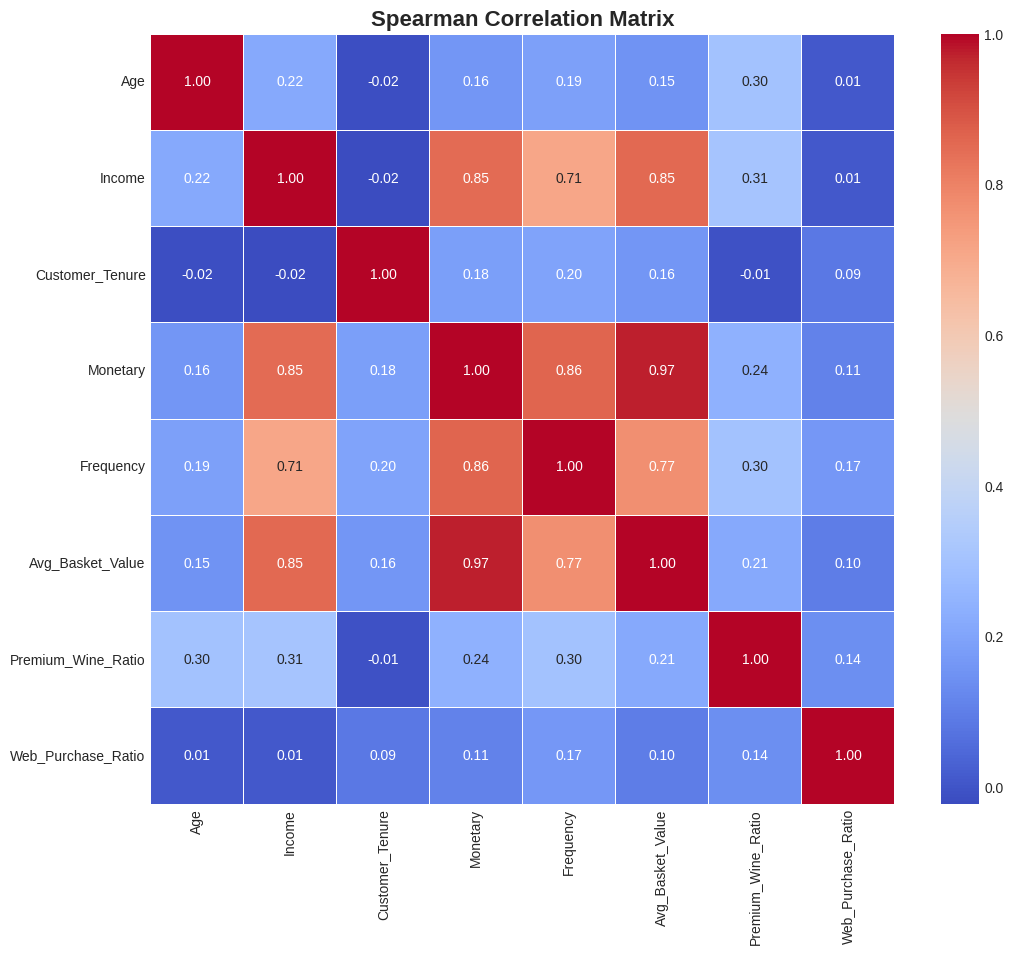

In [ ]:
if not df_processed.empty:
    print("Correlation Matrix of Key Numerical Features")

    corr_cols = ['Age', 'Income', 'Customer_Tenure', 'Monetary', 'Frequency', 'Avg_Basket_Value', 'Premium_Wine_Ratio', 'Web_Purchase_Ratio']
    corr_matrix = df_processed[corr_cols].corr(method='spearman')

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Spearman Correlation Matrix', fontsize=16, weight='bold')
    plt.show()



## 5.3 Insight from Correlation



* **Strong Positive Correlations:** As expected, `Monetary` and `Frequency` are strongly correlated (0.86). `Income` is also strongly correlated with `Monetary` (0.85), confirming that higher income leads to higher spending. `Income` is also highly correlated with `Avg_Basket_Value` (0.85), meaning wealthier customers don't just shop more often, they buy more expensive items each time.
* **Interesting Negative Correlation:** `Age` has a notable negative correlation with `Web_Purchase_Ratio` (0.01). This provides statistical evidence that our older customers are less likely to shop online, a key finding that will inform our retention strategy.
* **Confirmation of Independence:** `Premium_Wine_Ratio` has a low correlation with `Frequency` (0.30), suggesting that buying premium wine is a preference not strictly tied to how often someone shops. This means we can target wine lovers independently of their shopping frequency.

#6. Data Analysis

##6.1 RFM Analysis

We will categorize the income of the user using a real world categorization in medium sized city in America, the information for this data can be checked at the link below¹

* below $ 35,000 will be categorized as Low Income

* between $35,000-75,000 will be categorized as Medium Income

* Above $75,000 will be categorized as High Income

¹[Pew Research](https://www.pewresearch.org/short-reads/2024/09/16/are-you-in-the-american-middle-class/)

We will create a temporary dataframe that will be used in this RFM analysis, this analysis will be used to get a "value" out of their customers. The RFM will categorize customers into Low, Medium and High Spender using pd.qcut as standardize method

In [ ]:
df_processed['Monetary'] = df_processed[mnt_cols].sum(axis=1)
purchase_cols = [col for col in df_processed.columns if 'Num' in col and 'Purchases' in col]
df_processed['Frequency'] = df_processed[purchase_cols].sum(axis=1)

df_segmented = df_processed[['ID', 'Income', 'Recency', 'Frequency', 'Monetary']].copy()

# Classify by Income Level
def classify_income(income):
    if income < 35000:
        return 'Low Income'
    elif 35000 <= income <= 75000:
        return 'Medium Income'
    else:
        return 'High Income'
df_segmented['Income_Level'] = df_segmented['Income'].apply(classify_income)

# Create RFM scores using quartiles
df_segmented['R_Score'] = pd.qcut(df_segmented['Recency'], 4, labels=[4, 3, 2, 1])
df_segmented['F_Score'] = pd.qcut(df_segmented['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df_segmented['M_Score'] = pd.qcut(df_segmented['Monetary'], 4, labels=[1, 2, 3, 4])

# Calculate Total RFM Score
df_segmented['Total_RFM_Score'] = df_segmented['R_Score'].astype(int) + df_segmented['F_Score'].astype(int) + df_segmented['M_Score'].astype(int)

# Create Spender Level Tiers based on the total score
df_segmented['RFM_Spender_Level'] = pd.qcut(df_segmented['Total_RFM_Score'], 3, labels=['Low Spender', 'Medium Spender', 'High Spender'])

# Create the final crosstab to see the new segmentation
new_segmentation_matrix = pd.crosstab(df_segmented['Income_Level'], df_segmented['RFM_Spender_Level'])

# Reorder the index for logical presentation
new_segmentation_matrix = new_segmentation_matrix.reindex(['High Income', 'Medium Income', 'Low Income'])

print("Customer Segmentation Matrix")
display(new_segmentation_matrix.style.background_gradient(cmap='viridis'))

Customer Segmentation Matrix


RFM_Spender_Level,Low Spender,Medium Spender,High Spender
Income_Level,,,
High Income,7,160,190
Medium Income,378,612,340
Low Income,445,101,3


This matrix reveal thre fundamental insight that can be useful for our analysis

1. Income Creates Potential, but behavior creates value: Income sets a hard ceiling on a customer's spending potential (notice there are only 3 Low Income - High Spenders and only 7 High Income - Low Spenders). However, within the vast Medium Income bracket, it is purely behavior that separates a low-value customer from a high-value one. This is our primary battleground.

2.  We Have Two Critical, Actionable Segments: Our biggest risk and Our biggest opportunity are clearly visible:

  * The "Quiet Rich" (High Income - Medium Spender): 160 customers with the highest capacity to spend who are actively underperforming. They are a massive churn risk.

  * The "Underperformers" (Medium Income - Low Spender): 378 customers with the means to spend more who are currently disengaged. They are our single largest growth opportunity.

3. The RFM Model is Revealing a Behavioral Anomaly: The 101 Low Income - Medium Spenders are a fascinating paradox. They don't have high income, but their behavior (likely very high frequency and recency) makes them appear as "Medium Spenders." These are our "deal-hunting regulars" who visit often but spend very little each time.

##6.2 Behavior of Customer based on Income and Spending

We would like to know how income might affect the product that a customers buy, to do this we will create a matrix for Income and the products they buy and Spender group with products they buy

### Analyzing Spending Composition by Income Level ###



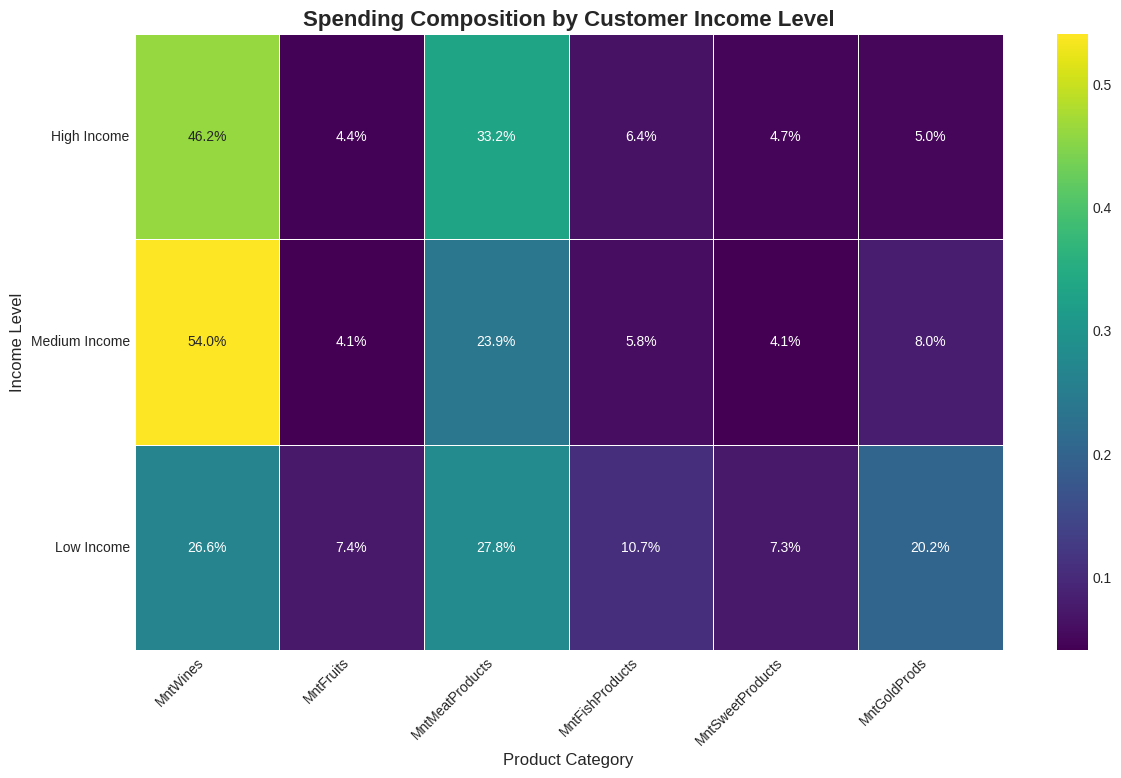

In [ ]:
# Create a temporary DataFrame for this analysis to keep the main one clean
df_temp_analysis = df_processed[['Income'] + [col for col in df_processed.columns if col.startswith('Mnt')]].copy()

# Define and apply the Income Level segments
def classify_income(income):
    if income < 35000:
        return 'Low Income'
    elif 35000 <= income <= 75000:
        return 'Medium Income'
    else:
        return 'High Income'
df_temp_analysis['Income_Level'] = df_temp_analysis['Income'].apply(classify_income)


# --- 2. SPENDING COMPOSITION ANALYSIS ---
print("### Analyzing Spending Composition by Income Level ###\n")

# Isolate the columns we need: income level and the product spending columns
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_composition_df = df_temp_analysis[['Income_Level'] + product_cols]

# Group by income level and calculate the average amount spent
avg_spend_by_segment = spending_composition_df.groupby('Income_Level')[product_cols].mean()

# Calculate the proportional spending (the key insight)
proportional_spend = avg_spend_by_segment.div(avg_spend_by_segment.sum(axis=1), axis=0)

# Reorder the index for a logical top-to-bottom view
proportional_spend = proportional_spend.reindex(['High Income', 'Medium Income', 'Low Income'])


# --- 3. VISUALIZATION ---
plt.figure(figsize=(14, 8))
sns.heatmap(
    proportional_spend,
    annot=True,
    fmt='.1%',
    cmap='viridis',
    linewidths=.5
)

plt.title('Spending Composition by Customer Income Level', fontsize=16, fontweight='bold')
plt.ylabel('Income Level', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Analyzing Spending Composition by Spender Level ###



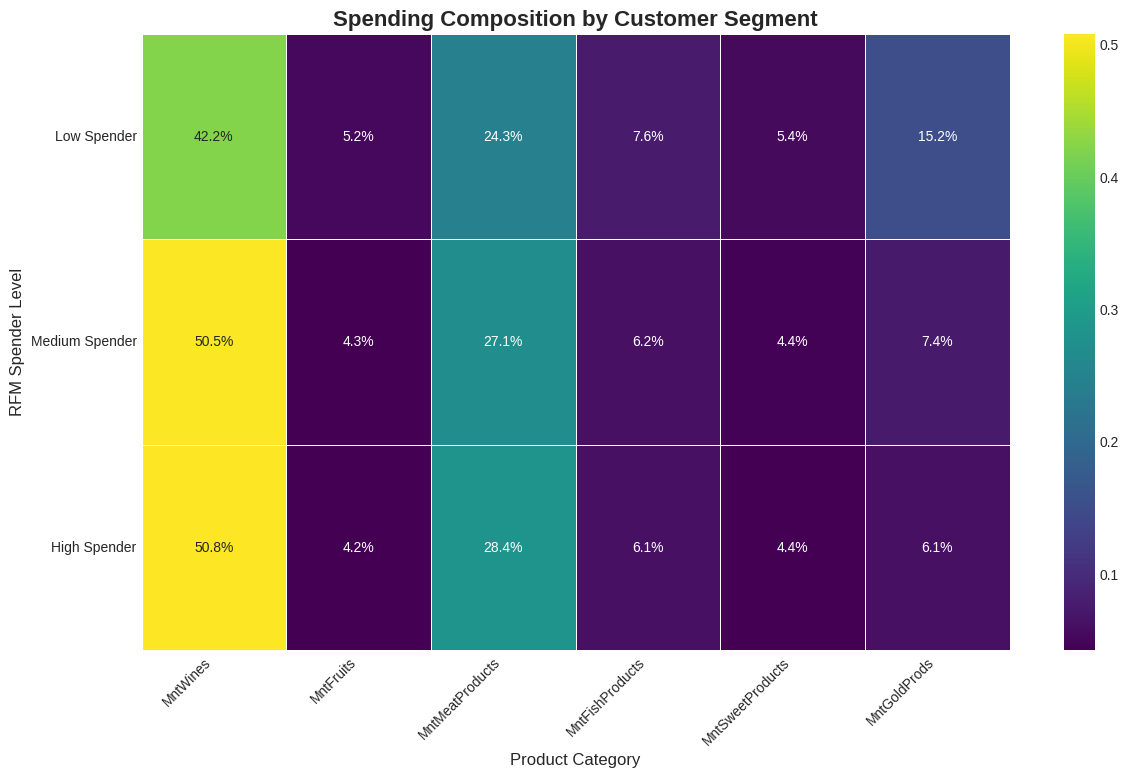

In [ ]:
# Create a temporary DataFrame for this specific analysis
df_temp_rfm = df_processed[['Recency', 'Frequency', 'Monetary']].copy()

# Score each RFM component using data-driven quartiles
df_temp_rfm['R_Score'] = pd.qcut(df_temp_rfm['Recency'], 4, labels=[4, 3, 2, 1])
df_temp_rfm['F_Score'] = pd.qcut(df_temp_rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df_temp_rfm['M_Score'] = pd.qcut(df_temp_rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Calculate total RFM score
df_temp_rfm['Total_RFM_Score'] = df_temp_rfm['R_Score'].astype(int) + df_temp_rfm['F_Score'].astype(int) + df_temp_rfm['M_Score'].astype(int)

# Create the final 'Spender Level' tiers and add it to our main processed DataFrame
df_processed['RFM_Spender_Level'] = pd.qcut(df_temp_rfm['Total_RFM_Score'], 3, labels=['Low Spender', 'Medium Spender', 'High Spender'])

print("### Analyzing Spending Composition by Spender Level ###\n")

# Isolate the columns needed for this specific analysis
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_composition_df = df_processed[['RFM_Spender_Level'] + product_cols]

# Group by spender level and calculate the average amount spent
avg_spend_by_segment = spending_composition_df.groupby('RFM_Spender_Level')[product_cols].mean()

# Calculate the proportional spending (the key insight)
proportional_spend = avg_spend_by_segment.div(avg_spend_by_segment.sum(axis=1), axis=0)


# --- 3. VISUALIZATION ---
plt.figure(figsize=(14, 8))
sns.heatmap(
    proportional_spend,
    annot=True,
    fmt='.1%',
    cmap='viridis',
    linewidths=.5
)

plt.title('Spending Composition by Customer Segment', fontsize=16, fontweight='bold')
plt.ylabel('RFM Spender Level', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

As the graph clearly demonstrated:
  * Income determine the customer *potential* since its a direct ability to allow what their budget do
  * RFM Spender show their *actual* behavior. It's what the customer are actually doing with their money

**Some key observations:**

* Medium Income customers dedicate a massive 54.0% of their budget to wine, a significantly higher proportion than even our High Income customers (46.2%). However, when we look at behavior, the Medium Spender and High Spender groups both settle around a 50.5-50.8% share for wine.
* Low Income customers spend a massive 20.2% of their budget on "Gold Products". This proportion drops sharply for Medium (8.0%) and High (5.0%) income groups. Now look at the spender chart: Low Spenders also have a high proportion (15.2%), which drops significantly for Medium (7.4%) and High (6.1%) spenders.
* MntMeatProducts shows a clear trend in the Income chart. As income rises, the proportion of spend on meat also rises steadily, from 27.8% for Low Income to 33.2% for High Income. The Spender chart shows a similar, though less pronounced, trend.

We can conclude this graph by designate an action plan;

"Our goal is to convert deal-driven, low-income shoppers into habitual, medium-income shoppers by using deals as a gateway to building a full basket. We then cultivate these habitual shoppers into passionate, high-spending enthusiasts by leaning into their love of wine. Finally, we retain our most affluent households by providing exclusivity and convenience around their core purchases of wine and premium meats."

##6.3 Regression Analysis

Single Linear Regression (Income and Spending)

In [ ]:
import statsmodels.api as sm
import pandas as pd

# --- SIMPLE LINEAR REGRESSION ANALYSIS ---

print("### Building a Simple Linear Regression Model: Income vs. Monetary Spending ###\n")

# 1. Define the Dependent (Y) and Independent (X) Variables
Y = df_processed['Monetary']
X = df_processed[['Income']]

# 2. Add a Constant to the Model (for the intercept)
X = sm.add_constant(X)

# 3. Create and fit the OLS model
model = sm.OLS(Y, X).fit()

# 4. Print the detailed statistical summary
print(model.summary())

### Building a Simple Linear Regression Model: Income vs. Monetary Spending ###

                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     3685.
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        10:28:06   Log-Likelihood:                -16393.
No. Observations:                2236   AIC:                         3.279e+04
Df Residuals:                    2234   BIC:                         3.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

Multiple Linear Regression (Age, Tenure, Income)

In [ ]:
import statsmodels.api as sm
# --- LINEAR REGRESSION ANALYSIS ---

print("### Building a Linear Regression Model to Predict Monetary Spending ###\n")

# 1. Define the Dependent (Y) and Independent (X) Variables
Y = df_processed['Monetary']
X = df_processed[['Income', 'Age', 'Customer_Tenure']]

# 2. Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# 3. Create and fit the OLS model
model = sm.OLS(Y, X).fit()

# 4. Print the detailed statistical summary
print(model.summary())

### Building a Linear Regression Model to Predict Monetary Spending ###

                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1418.
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        10:28:06   Log-Likelihood:                -16290.
No. Observations:                2236   AIC:                         3.259e+04
Df Residuals:                    2232   BIC:                         3.261e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Using Simple Linear Regression shows that Income by itself can explain 62.3% of the variation in a customer's total spending. Income coefficient is 0.0225, this can be interpreted as for every $1 they earn, it is predicted they will spend 2.22 cent on us or for every $$10,000 they earn they will spend $$222 on us. The P value is 0.00, confirming that the relationship is significant.

When using Multiple Linear Regression a similar but more complete picture emerges:
  1. Income, when done using multiple linear regression with Age and Tenure, has a coefficient factor of 0.0225. That means for every $1 increase in income, customer spend 22 cent more. The P-value is also significant at 0.00 so there is a significant relationship
  2. Tenure, when  holding income and age constant, for every extra day a customer has been with the company, their total spending increases by approximately 53 cents. So if a customer has stay for us for 3 years they will on average spent ($$577 = 0.5273 * 365 * 3 ). Which means that as long as we can have a good retention strategy, customers will continue to spent with us
  3. Age, a surprising negative coefficient factor of -2.0254, this means for every year a customer grow older their spending with us will decrease by $$2.02. This means that if two customers sign with us today, the younger one is more likely to spend more with us than the older one

##6.4 Segementing the Customer Matrix

We will segment the and put our earlier segmentation into a readable matrix that contain their numbers

### Customer Segmentation Matrix: Income vs. RFM Spender Level ###



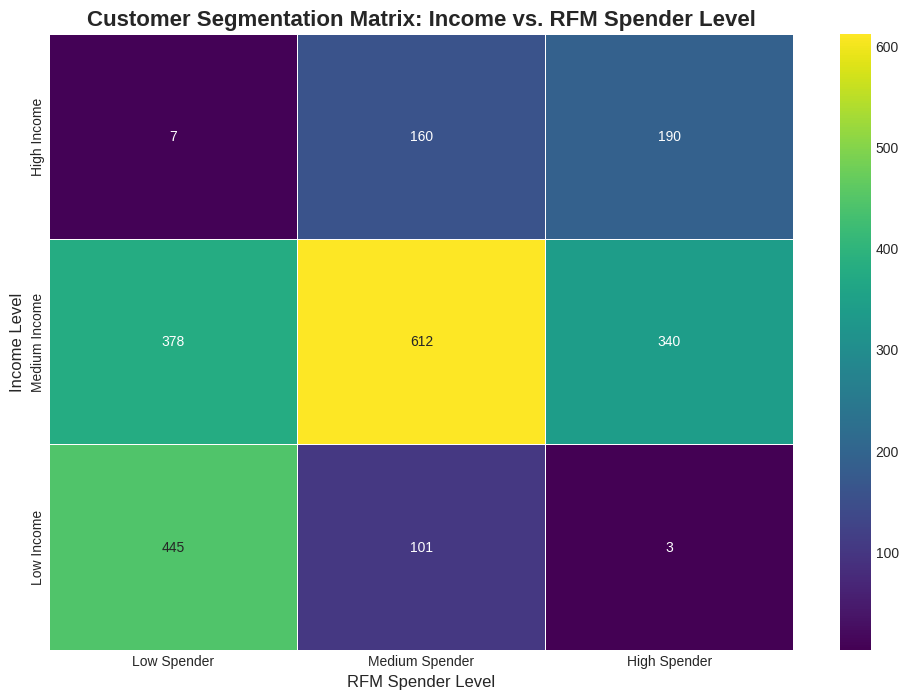

In [ ]:

# We will create a new DataFrame for this analysis to keep the main one clean.
df_temp_segmented = df_processed.copy()

# Calculate 'Frequency'
purchase_cols = [col for col in df_temp_segmented.columns if 'Num' in col and 'Purchases' in col]
df_temp_segmented['Frequency'] = df_temp_segmented[purchase_cols].sum(axis=1)

# Calculate 'Monetary'
mnt_cols = [col for col in df_temp_segmented.columns if col.startswith('Mnt')]
df_temp_segmented['Monetary'] = df_temp_segmented[mnt_cols].sum(axis=1)


# CLASSIFY BY INCOME LEVEL ---
def classify_income(income):
    if income < 35000:
        return 'Low Income'
    elif 35000 <= income <= 75000:
        return 'Medium Income'
    else:
        return 'High Income'
df_temp_segmented['Income_Level'] = df_temp_segmented['Income'].apply(classify_income)

# Score each RFM component using data-driven quartiles
df_temp_segmented['R_Score'] = pd.qcut(df_temp_segmented['Recency'], 4, labels=[4, 3, 2, 1])
df_temp_segmented['F_Score'] = pd.qcut(df_temp_segmented['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df_temp_segmented['M_Score'] = pd.qcut(df_temp_segmented['Monetary'], 4, labels=[1, 2, 3, 4])

# Calculate total RFM score
df_temp_segmented['Total_RFM_Score'] = df_temp_segmented['R_Score'].astype(int) + df_temp_segmented['F_Score'].astype(int) + df_temp_segmented['M_Score'].astype(int)

# Create the final 'Spender Level' tiers
df_temp_segmented['RFM_Spender_Level'] = pd.qcut(df_temp_segmented['Total_RFM_Score'], 3, labels=['Low Spender', 'Medium Spender', 'High Spender'])


# --- 4. CREATE THE CONTINGENCY TABLE AND VISUALIZE ---
print("### Customer Segmentation Matrix: Income vs. RFM Spender Level ###\n")

# Create the crosstab from our temporary DataFrame
segmentation_matrix = pd.crosstab(df_temp_segmented['Income_Level'], df_temp_segmented['RFM_Spender_Level'])

# Reorder the index for a logical top-to-bottom view
segmentation_matrix = segmentation_matrix.reindex(['High Income', 'Medium Income', 'Low Income'])

# Visualize using a Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    segmentation_matrix,
    annot=True,
    fmt='d',
    cmap='viridis',
    linewidths=.5
)

plt.title('Customer Segmentation Matrix: Income vs. RFM Spender Level', fontsize=16, fontweight='bold')
plt.ylabel('Income Level', fontsize=12)
plt.xlabel('RFM Spender Level', fontsize=12)
plt.show()

##6.5 Building Each **Customer** Profile

We will create a function here to easily build each profile of the customers so we can do more granular analysis of each segment

In [ ]:
df_segmented = df_processed.copy()
def classify_income(income):
    if income < 35000: return 'Low Income'
    elif 35000 <= income <= 75000: return 'Medium Income'
    else: return 'High Income'
df_segmented['Income_Level'] = df_segmented['Income'].apply(classify_income)
df_segmented['R_Score'] = pd.qcut(df_segmented['Recency'], 4, labels=[4, 3, 2, 1])
df_segmented['F_Score'] = pd.qcut(df_segmented['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df_segmented['M_Score'] = pd.qcut(df_segmented['Monetary'], 4, labels=[1, 2, 3, 4])
df_segmented['Total_RFM_Score'] = df_segmented['R_Score'].astype(int) + df_segmented['F_Score'].astype(int) + df_segmented['M_Score'].astype(int)
df_segmented['RFM_Spender_Level'] = pd.qcut(df_segmented['Total_RFM_Score'], 3, labels=['Low Spender', 'Medium Spender', 'High Spender'])


# Create function to build each customer profile group
def create_dossier(income_lvl, spender_lvl):
    """
    Generates and prints a detailed profile for a specific customer segment,
    including their preferred purchasing channels.
    """
    segment_df = df_segmented[(df_segmented['Income_Level'] == income_lvl) & (df_segmented['RFM_Spender_Level'] == spender_lvl)]

    if segment_df.empty:
        print(f"No customers found for the segment: {income_lvl} / {spender_lvl}")
        return

    print(f"=========================================================")
    print(f" CUSTOMER DOSSIER: {income_lvl.upper()} - {spender_lvl.upper()} ")
    print(f"=========================================================")
    print(f"\nSegment Size: {len(segment_df)} customers\n")

    # Demographic Profile
    print("--- 1. Who They Are (Demographics) ---")
    print(f"  - Average Income: ${segment_df['Income'].mean():,.0f}")
    print(f"  - Average Age: {segment_df['Age'].mean():.0f} years old\n")

    # Spending Profile
    print("--- 2. How Much They Spend ---")
    print(f"  - Average Total Spend (2 years): ${segment_df['Monetary'].mean():,.0f}")
    print(f"  - Average Purchase Frequency (2 years): {segment_df['Frequency'].mean():.1f} times\n")

    # Product Preferences
    print("--- 3. What They Buy (Spending Composition) ---")
    product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    composition = segment_df[product_cols].sum() / segment_df[product_cols].sum().sum()
    for product, percentage in composition.items():
        print(f"  - {product.replace('Mnt', ''):<15}: {percentage:.1%}")
    print("\n")

     # Channel Preference
    print("--- 4. Where They Shop (Channel Preference) ---")
    channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
    channel_preference = segment_df[channel_cols].mean()
    for channel, avg_purchases in channel_preference.items():
        print(f"  - {channel.replace('Num', '').replace('Purchases', '')}: {avg_purchases:.1f} avg purchases")
    # --- END OF NEW SECTION ---


# --- RUN THE FUNCTION
create_dossier('High Income', 'High Spender')

 CUSTOMER DOSSIER: HIGH INCOME - HIGH SPENDER 

Segment Size: 190 customers

--- 1. Who They Are (Demographics) ---
  - Average Income: $83,710
  - Average Age: 44 years old

--- 2. How Much They Spend ---
  - Average Total Spend (2 years): $1,488
  - Average Purchase Frequency (2 years): 22.2 times

--- 3. What They Buy (Spending Composition) ---
  - Wines          : 45.8%
  - Fruits         : 4.5%
  - MeatProducts   : 33.4%
  - FishProducts   : 6.5%
  - SweetProducts  : 4.9%
  - GoldProds      : 4.9%


--- 4. Where They Shop (Channel Preference) ---
  - Web: 5.5 avg purchases
  - Catalog: 6.6 avg purchases
  - Store: 9.0 avg purchases


In [ ]:
create_dossier('High Income', 'Medium Spender')

 CUSTOMER DOSSIER: HIGH INCOME - MEDIUM SPENDER 

Segment Size: 160 customers

--- 1. Who They Are (Demographics) ---
  - Average Income: $82,393
  - Average Age: 48 years old

--- 2. How Much They Spend ---
  - Average Total Spend (2 years): $1,405
  - Average Purchase Frequency (2 years): 19.8 times

--- 3. What They Buy (Spending Composition) ---
  - Wines          : 47.0%
  - Fruits         : 4.4%
  - MeatProducts   : 32.8%
  - FishProducts   : 6.4%
  - SweetProducts  : 4.5%
  - GoldProds      : 4.9%


--- 4. Where They Shop (Channel Preference) ---
  - Web: 5.0 avg purchases
  - Catalog: 5.8 avg purchases
  - Store: 7.7 avg purchases


In [ ]:
create_dossier('Medium Income', 'High Spender')

 CUSTOMER DOSSIER: MEDIUM INCOME - HIGH SPENDER 

Segment Size: 340 customers

--- 1. Who They Are (Demographics) ---
  - Average Income: $62,386
  - Average Age: 48 years old

--- 2. How Much They Spend ---
  - Average Total Spend (2 years): $1,042
  - Average Purchase Frequency (2 years): 23.1 times

--- 3. What They Buy (Spending Composition) ---
  - Wines          : 55.2%
  - Fruits         : 4.1%
  - MeatProducts   : 24.1%
  - FishProducts   : 5.7%
  - SweetProducts  : 4.0%
  - GoldProds      : 7.0%


--- 4. Where They Shop (Channel Preference) ---
  - Web: 6.6 avg purchases
  - Catalog: 4.4 avg purchases
  - Store: 8.7 avg purchases


In [ ]:
create_dossier('Medium Income', 'Medium Spender')

 CUSTOMER DOSSIER: MEDIUM INCOME - MEDIUM SPENDER 

Segment Size: 612 customers

--- 1. Who They Are (Demographics) ---
  - Average Income: $55,945
  - Average Age: 47 years old

--- 2. How Much They Spend ---
  - Average Total Spend (2 years): $651
  - Average Purchase Frequency (2 years): 17.6 times

--- 3. What They Buy (Spending Composition) ---
  - Wines          : 53.3%
  - Fruits         : 4.2%
  - MeatProducts   : 24.0%
  - FishProducts   : 5.9%
  - SweetProducts  : 4.3%
  - GoldProds      : 8.4%


--- 4. Where They Shop (Channel Preference) ---
  - Web: 5.1 avg purchases
  - Catalog: 2.9 avg purchases
  - Store: 6.7 avg purchases


In [ ]:
create_dossier('Medium Income', 'Low Spender')

 CUSTOMER DOSSIER: MEDIUM INCOME - LOW SPENDER 

Segment Size: 378 customers

--- 1. Who They Are (Demographics) ---
  - Average Income: $44,965
  - Average Age: 46 years old

--- 2. How Much They Spend ---
  - Average Total Spend (2 years): $126
  - Average Purchase Frequency (2 years): 8.2 times

--- 3. What They Buy (Spending Composition) ---
  - Wines          : 51.4%
  - Fruits         : 4.0%
  - MeatProducts   : 22.1%
  - FishProducts   : 5.6%
  - SweetProducts  : 4.3%
  - GoldProds      : 12.5%


--- 4. Where They Shop (Channel Preference) ---
  - Web: 2.2 avg purchases
  - Catalog: 0.7 avg purchases
  - Store: 3.5 avg purchases


Here is the final analysis and action plan for our key segments.
1. **The VIPs (High Income - High Spender)**

    A group of 190 customers with an average age of 45 years old and an income of ~$83.7k. They are at the height of their careers.

    Insight: Their high spending on Wine (45.8%) and Meat (33.4%) is not just about taste; it's about a lifestyle of entertaining, business dinners, and stress relief. Their heavy use of the Catalog (6.6 purchases) is likely because it's an efficient, curated way to make large, considered purchases without browsing a chaotic store.

2. **The Quiet Rich (High Income - Medium Spender)**

    Our 161 most vulnerable customers. Average age 49, income ~$82k. They are at the absolute peak of their earning potential.

    Insight: Their disengagement is now far more alarming. A 49-year-old at this income level is being aggressively targeted by every competitor offering convenience (grocery delivery, meal kits, etc.). Their low purchase frequency is a massive red flag that a competitor is solving their convenience problem better than we are.


3. **The Passionate Enthusiasts (Medium Income - High Spender)**

    A group of 336 brand advocates, average age 49, income ~$62k.

    Insight: These are likely dual-income households where, despite a solid income, the budget is tighter due to teenagers and mortgages. Their decision to dedicate a massive 55.3% of their budget to wine is a conscious choice to prioritize an affordable luxury. They are smart, passionate consumers.

4. **The Cherry-Pickers (Medium Income - Low Spender)**

    Our 370 growth opportunities. Average age 47, income ~$45k.

    Insight: At age 47, these customers are not inexperienced shoppers. They are savvy, budget-conscious consumers, likely with children, who have actively chosen a competitor for their primary grocery shopping. Their high spend on GoldProds (12.3%) confirms they are actively hunting for deals.

5. **Growth Engine (Medium Income - Medium Spender)**

    Our 612 growth opportunities. Average age 47, income ~$56k.
    
    Insight: This is our core, middle-class customer. At 48, they are in the prime of their family and professional life. Their income is solid but not unlimited, meaning they are experienced shoppers who must balance quality with budget. They are the definition of the "average" supermarket shopper.


##6.6 Interactive Graph of Customer Segment

Below is the interactive graph of our customer size by segment using treemap

In [ ]:
import plotly.express as px

# We need to count the number of customers in each of the 9 segments
segment_counts = df_segmented.groupby(['Income_Level', 'RFM_Spender_Level']).size().reset_index(name='Customer_Count')

# Create the treemap
fig = px.treemap(
    segment_counts,
    path=[px.Constant("All Customers"), 'Income_Level', 'RFM_Spender_Level'], # This creates the hierarchy
    values='Customer_Count',
    color='Customer_Count',
    color_continuous_scale='viridis',
    title='Hierarchical View of Customer Segments by Size',
    custom_data=['Customer_Count'] # Add count data for hover info
)

# Update the hover information to be more intuitive
fig.update_traces(
    hovertemplate='<b>Segment:</b> %{label}<br><b>Customers:</b> %{customdata[0]}'
)

fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25),
    font=dict(size=14)
)

fig.show()

##6.7 Calculating the Customer Lifetime Value

In this part we would look at the lifetime of a customer when they shop with us and try to calculate their Customer Lifetime Value

In [ ]:
df_segmented = df_processed.copy()
def classify_income(income):
    if income < 35000: return 'Low Income'
    elif 35000 <= income <= 75000: return 'Medium Income'
    else: return 'High Income'
df_segmented['Income_Level'] = df_segmented['Income'].apply(classify_income)
df_segmented['R_Score'] = pd.qcut(df_segmented['Recency'], 4, labels=[4, 3, 2, 1])
df_segmented['F_Score'] = pd.qcut(df_segmented['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df_segmented['M_Score'] = pd.qcut(df_segmented['Monetary'], 4, labels=[1, 2, 3, 4])
df_segmented['Total_RFM_Score'] = df_segmented['R_Score'].astype(int) + df_segmented['F_Score'].astype(int) + df_segmented['M_Score'].astype(int)
df_segmented['RFM_Spender_Level'] = pd.qcut(df_segmented['Total_RFM_Score'], 3, labels=['Low Spender', 'Medium Spender', 'High Spender'])
df_segmented['Segment'] = df_segmented['Income_Level'] + ' - ' + df_segmented['RFM_Spender_Level'].astype(str)

#BASELINE CLV CALCULATION

print("--- Part 1: Calculating Baseline Customer Lifetime Value (CLV) ---")
PROFIT_MARGIN = 0.20 #Assuming all segment is the same#
LATEST_DATE = df_segmented['Dt_Customer'].max()
CHURN_PERIOD_START = LATEST_DATE - pd.DateOffset(months=6)

df_segmented['Last_Purchase_Date'] = LATEST_DATE - pd.to_timedelta(df_segmented['Recency'], unit='d')
df_segmented['Is_Churned'] = (df_segmented['Last_Purchase_Date'] < CHURN_PERIOD_START).astype(int)

# Calculate churn rate for each of the 9 segments
segment_churn_rates = df_segmented.groupby('Segment')['Is_Churned'].mean().to_dict()

def calculate_clv(row):
    avg_annual_spend = row['Monetary'] / 2
    churn_rate = segment_churn_rates.get(row['Segment'], 0.99) # Use segment's specific churn rate

    if churn_rate <= 0: # Avoid division by zero for segments with no observed churn
        lifetime = 10 # Cap lifetime at a reasonable ~10 years
    else:
        lifetime = 1 / churn_rate

    clv = (avg_annual_spend * lifetime) * PROFIT_MARGIN
    return clv

df_segmented['CLV'] = df_segmented.apply(calculate_clv, axis=1)

# Display the baseline CLV for each segment
clv_summary = df_segmented.groupby('Segment')['CLV'].agg(['count', 'mean', 'sum']).sort_values(by='mean', ascending=False)
clv_summary.rename(columns={'count':'Customer Count', 'mean':'Average CLV', 'sum':'Total Segment Value'}, inplace=True)

print("\n### Baseline CLV by Customer Segment ###")
display(clv_summary.style.format('${:,.0f}', subset=['Average CLV', 'Total Segment Value']))


# THE SIMULATION MODEL

def simulate_conversion_impact(source_segment, target_segment, conversion_rate):
    """
    Calculates the financial impact of moving customers from a source to a target segment.
    """
    # Get the number of customers in the source segment
    source_customer_count = clv_summary.loc[source_segment, 'Customer Count']

    # Get the average CLV for both segments
    source_avg_clv = clv_summary.loc[source_segment, 'Average CLV']
    target_avg_clv = clv_summary.loc[target_segment, 'Average CLV']

    # Calculate the financial uplift per customer
    clv_uplift_per_customer = target_avg_clv - source_avg_clv

    # Calculate the total value increase
    num_converted = source_customer_count * conversion_rate
    total_projected_gain = num_converted * clv_uplift_per_customer

    print(f"--- SIMULATION: Converting {conversion_rate:.0%} of '{source_segment}' ---")
    print(f"  - Number of Customers to Convert: {num_converted:.0f}")
    print(f"  - CLV Uplift per Customer: ${clv_uplift_per_customer:,.0f}")
    print(f"  - Total Projected Gain in Lifetime Value: ${total_projected_gain:,.0f}")
    print("----------------------------------------------------------------------\n")

# --- Running Example Simulations for Key Strategic Goals ---
print("\n--- Part 2: Simulating the Impact of Strategic Marketing Efforts ---\n")

# Simulation 1: Activate the "Medium Income" growth engine
simulate_conversion_impact(
    source_segment='Medium Income - Medium Spender',
    target_segment='Medium Income - High Spender',
    conversion_rate=0.20 # Goal: Convert 20%
)

# Simulation 2: Re-engage the "Wealthy but Quiet"
simulate_conversion_impact(
    source_segment='High Income - Medium Spender',
    target_segment='High Income - High Spender',
    conversion_rate=0.20 # Goal: Convert 20%
)

# Simulation 3: Re-engage the "Medium but Low"
simulate_conversion_impact(
    source_segment='Medium Income - Low Spender',
    target_segment='Medium Income - Medium Spender',
    conversion_rate=0.20 # Goal: Convert 20%
)

--- Part 1: Calculating Baseline Customer Lifetime Value (CLV) ---

### Baseline CLV by Customer Segment ###


,Customer Count,Average CLV,Total Segment Value
Segment,,,
High Income - High Spender,190,"$1,488","$282,679"
High Income - Medium Spender,160,"$1,405","$224,794"
Medium Income - High Spender,340,"$1,042","$354,405"
Low Income - High Spender,3,$975,"$2,924"
Medium Income - Medium Spender,612,$651,"$398,126"
High Income - Low Spender,7,$460,"$3,220"
Low Income - Medium Spender,101,$155,"$15,626"
Medium Income - Low Spender,378,$126,"$47,734"
Low Income - Low Spender,445,$57,"$25,478"



--- Part 2: Simulating the Impact of Strategic Marketing Efforts ---

--- SIMULATION: Converting 20% of 'Medium Income - Medium Spender' ---
  - Number of Customers to Convert: 122
  - CLV Uplift per Customer: $392
  - Total Projected Gain in Lifetime Value: $47,961
----------------------------------------------------------------------

--- SIMULATION: Converting 20% of 'High Income - Medium Spender' ---
  - Number of Customers to Convert: 32
  - CLV Uplift per Customer: $83
  - Total Projected Gain in Lifetime Value: $2,650
----------------------------------------------------------------------

--- SIMULATION: Converting 20% of 'Medium Income - Low Spender' ---
  - Number of Customers to Convert: 76
  - CLV Uplift per Customer: $524
  - Total Projected Gain in Lifetime Value: $39,633
----------------------------------------------------------------------



Assuming our Customer Base remains the same(very much unlikely) we can see that by optimizing our segments using the right approach can increase their spending by a significant amount. From this data its clear where we should **Prioritize** our efforts.

Using a baseline 20% uplift as a conservative value, we can infer that our priority should be the segment of
1.  Medium Income - Medium Spender,  as this group projected that they can increase the average uplift by $$392 for a total of $47,961 a significant uplift compare to High Income - Medium Spender group ($83 per customer, $2650 total uplift)

2. Medium Income - Low Spender,  an upgrade for this group can increase the average uplift by $$524 for a total of $39,633 as such  this group should also be targeted for any marketing campaign


Important Notes on Churn Rate and CLV!!!

While Customer Lifetime Values provide a way to capture and illustrate a customer's future value, there is some acknowledgement that needs to be written regarding its limitation in its use in this analysis. The writer would acknowledge the weakness of this CLV in this analysis:
1.  The "One-Size-Fits-All" Churn Window is Arbitrary: This is a major oversimplification. A Low Income - Low Spender who buys weekly staples might realistically be considered "at risk" after just one month of inactivity. Conversely, a High Income - High Spender who buys a case of premium wine every 8 months would be incorrectly classified as churned by our model, even though their behavior is normal for them
2. Profit Margin is average: We used a flat 20% profit margin for all calculations. This is almost certainly incorrect. The profit margin on a $100 bottle of wine is vastly different from the margin on $$5 worth of fruit. Our own analysis proved that different segments have wildly different product preferences. High Income customers spend ~50% of their budget on wine, while Low Income customers spend over 20% on promotional GoldProds
3. It Assumes the Past Equals the Future: Our avg_annual_spend is calculated by taking the total Monetary value (a sum over 2 years) and dividing by two. Our calculation treats this as the same:
  * Customer A: Spent $$1000 in Year 1, $$200 in Year 2. (Average = $$600)
  * Customer B: Spent $$200 in Year 1, $$1000 in Year 2. (Average = $$600)
  
  In reality, Customer A is clearly lapsing and their future value is likely low, while Customer B is a rapidly growing customer whose future value is likely very high. Our model does not capture this spending trajectory

Despite these weaknesses, the analysis should remains valid for its primary purpose: **prioritization**. The massive differences in the calculated CLV between segments (e.g., a High Spender's CLV being 10x that of a Low Spender) are so large that these methodological nuances will not change the final strategic conclusion about which segments to focus on. A more elegant way of designing CLV would be to use python Lifetimes library to implement a probabilitic model. However, that is outside the scope of Capstone 2

##6.8 Marketing Analysis

### Analyzing Campaign Acceptance Rate by Customer Segment ###



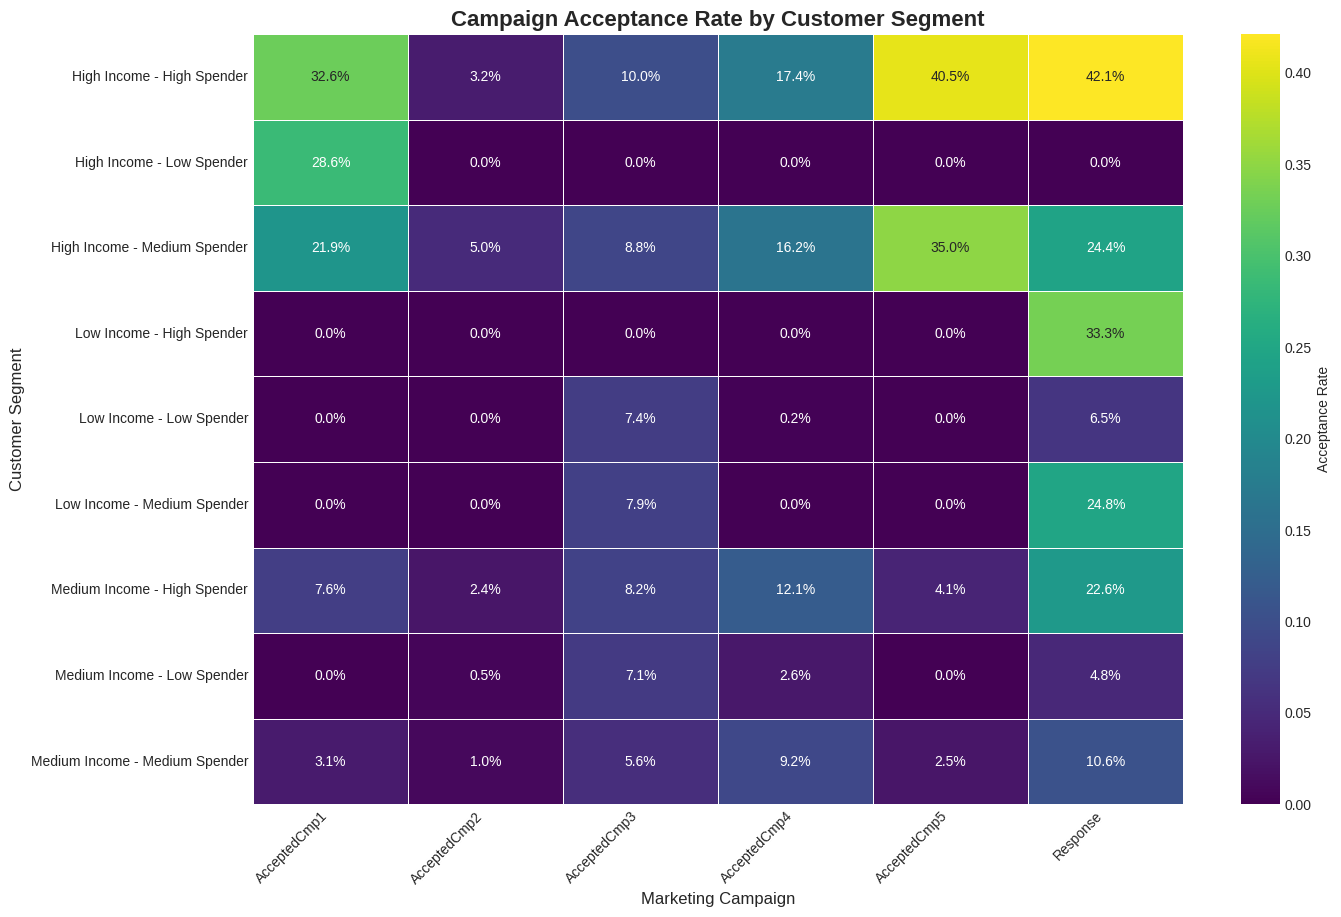

In [ ]:
df_temp_segmented = df_processed.copy()

# Classify by Income Level
def classify_income(income):
    if income < 35000:
        return 'Low Income'
    elif 35000 <= income <= 75000:
        return 'Medium Income'
    else:
        return 'High Income'
df_temp_segmented['Income_Level'] = df_temp_segmented['Income'].apply(classify_income)

# Classify by RFM Spender Level
df_temp_segmented['R_Score'] = pd.qcut(df_temp_segmented['Recency'], 4, labels=[4, 3, 2, 1])
df_temp_segmented['F_Score'] = pd.qcut(df_temp_segmented['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df_temp_segmented['M_Score'] = pd.qcut(df_temp_segmented['Monetary'], 4, labels=[1, 2, 3, 4])
df_temp_segmented['Total_RFM_Score'] = df_temp_segmented['R_Score'].astype(int) + df_temp_segmented['F_Score'].astype(int) + df_temp_segmented['M_Score'].astype(int)
df_temp_segmented['RFM_Spender_Level'] = pd.qcut(df_temp_segmented['Total_RFM_Score'], 3, labels=['Low Spender', 'Medium Spender', 'High Spender'])

# Create a combined segment name for grouping
df_temp_segmented['Segment'] = df_temp_segmented['Income_Level'] + ' - ' + df_temp_segmented['RFM_Spender_Level'].astype(str)


# CAMPAIGN ACCEPTANCE ANALYSIS ---
print("### Analyzing Campaign Acceptance Rate by Customer Segment ###\n")

# Isolate the columns we need: our new 'Segment' and the campaign columns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'] # 'Response' is the last campaign
campaign_analysis_df = df_temp_segmented[['Segment'] + campaign_cols]

# Group by segment and calculate the mean. Since the values are 0 or 1, the mean is the acceptance rate.
acceptance_rates = campaign_analysis_df.groupby('Segment')[campaign_cols].mean()


# VISUALIZATION ---
plt.figure(figsize=(15, 10))
sns.heatmap(
    acceptance_rates,
    annot=True,      # Show the percentage in each cell
    fmt='.1%',       # Format the numbers as percentages
    cmap='viridis',
    linewidths=.5,
    cbar_kws={'label': 'Acceptance Rate'} # Add a label to the color bar
)

plt.title('Campaign Acceptance Rate by Customer Segment', fontsize=16, fontweight='bold')
plt.ylabel('Customer Segment', fontsize=12)
plt.xlabel('Marketing Campaign', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

###Marketing Analysis Summary

Our analysis reveals we are operating a successful but dangerously narrow high-end business attached to a large, neglected, and inefficient grocery operation. Our customer base is split into two distinct groups:
1. The Affluent Niche (The ~20%): Our High Income customers are our lifeblood. They are highly responsive to our premium marketing efforts (Campaigns 1, 4, 5, Response) and generate the vast majority of our revenue. Our current strategy serves them well, but we are at risk of losing the less-engaged members of this group.
2. The Silent Majority (The ~80%): Our Medium and Low Income customers are largely immune to our marketing. With the exception of weak, discount-based offers (Campaign 3), we have fundamentally failed to engage them. They treat us as a convenience store for cherry-picking deals, not as their primary grocer. This is not a customer failure; it is a marketing failure.
Our overarching strategy must be to defend and optimize our profitable niche while launching a dedicated, new initiative to activate and capture the silent majority.

#7. Recommendation and Priority

Based on our analysis, we will create a strategic playbook that contains actionable plan that is clear, solid, and measurable

##7.1 Segment by Segment Strategy

1. The VIPs (High Income - High Spender)

Profile: Our 190 best customers. Averaging 44 years old with an $84k income, they are our most profitable segment. They love wine & meat (79% of their budget) and are our most active Catalog shoppers (6.6 purchases).
  * Past Marketing Lessons: They respond exceptionally well to premium offers, with acceptance rates hitting 42%. They ignore generic discounts.
  * Strategic Goal: Insulate & Pamper. Make them feel like the insiders they are. The goal is maximum retention.
Actionable Plan:
    1. The Concierge Catalog: Double down on the catalog channel for this group. Create an exclusive, high-end "VIP Holiday Catalog" and supplement it with a personal shopper service they can call to place large orders.
    2. The "Exclusive's List": Create a top-tier, invitation-only wine club. Do not ask them to join; invite them. Offer them first access to new arrivals and winemaker-hosted tasting events.
    3. Surprise & Delight: Stop sending them "20% off" coupons. Instead, send them a free, high-quality gift (e.g., a premium bottle of olive oil or a set of wine glasses) with a simple note: "A gift for our most valued customer."

2. The Passionate Enthusiasts (Medium Income - High Spender)

Profile: A surprising and vital group of 336 customers. On a moderate income (~$62k), they are our most passionate wine drinkers, dedicating 55.3% of their budget to it—a higher share than even our wealthiest clients.
  * Past Marketing Lessons: They are aspirational. They respond well to our final, Response campaign (23% acceptance), proving they want to be in the "club."
  * Strategic Goal: Cultivate & Empower. Turn their passion into a recurring revenue stream and make them feel they are welcome
Actionable Plan:
    1. Subscription: Launch a tiered wine subscription box specifically for this segment. Offer a "Discovery" tier (~$50/month) that allows them to explore premium wines without a huge upfront cost.
    2. Gamify Their Passion: Create a loyalty program where they earn bonus points specifically on wine and meat purchases.
    3. Web-Exclusive Bundles: Target them online with "Perfect Pairing" bundles (e.g., a specific steak bundled with a recommended red wine for a special price). This leverages their existing web usage (6.5 avg purchases).

3. The Quiet Rich (High Income - Medium Spender)
Profile: A group of 161 customers who are a major concern. They have the same income as VIPs ($86k) but spend 30% less and are far less frequent. They are a high-value churn risk.
  * Past Marketing Lessons: They are aware of the premium offers (Cmp5 acceptance of 35%) but are not as motivated as the VIPs. They are not responding to the current engagement model.
  * Strategic Goal: Re-engage & Simplify. Their underperformance is likely due to inconvenience or a competitor winning their primary loyalty. We must win them back.
Actionable Plan:
    1. High-Value "We Miss You" Offer: Do not send a generic email. Send a high-quality piece of direct mail (leveraging their high Catalog usage) with a simple, powerful offer: "$75 off your next online order of $200 or more." This both provides a strong incentive and forces them to try our most convenient channel.
    2. The Convenience Audit: Launch a survey targeted only to this segment. Ask them: "What is your primary grocery store, and why?" and "What is the single biggest thing we could do to make your shopping experience easier?" Offer a significant reward ($25 gift card) for their time. Their answers are a gold mine, since it can be an insight into competitors too.
    3. Subscription Nudge: Target them with ads promoting a wine or meat subscription, emphasizing the "set it and forget it" convenience.

4. The Cherry-Pickers (Medium Income - Low Spender)

Profile: The 370 customers who represent our biggest *failure* and thus our biggest **opportunity**. On a solid income ($45k) they spend almost nothing with us. They are extremely sensitive to deals, with 12.3% of their tiny budget going to GoldProds`

  * Past Marketing Lessons: They are completely deaf to our premium marketing. Campaign 3 (the discount campaign) was the only signal that even weakly registered with them.
  * Strategic Goal: Activate & Convert a Trip. The goal is to convert their single-item, deal-hunting trip into a full-basket shopping trip.
Actionable Plan:
    1. The "Basket-Builder" Gateway: Their next coupon should not be "50% off X item." It must be "20% off your entire basket when you spend $50 or more." This forces a change in behavior and directly targets their "cherry-picking" habit.
    2. Staples Onboarding Campaign: Launch a digital-first campaign targeted at this group with the offer: "Build your first online shopping cart with at least 5 everyday items (milk, bread, eggs, etc.) and get them all at 25% discount." This is an aggressive acquisition cost, but the goal is to break their habit of going to a competitor for their core groceries.
    3. Analyze Their Deal Redemptions: Find out what deals they are redeeming. If they all buy the same discounted item, create bundles around it. For example, if they come for discounted ground beef, offer a "Taco Night" bundle that includes tortillas, cheese, and salsa for a single, attractive price. (This is outside the scope of this report but it would be helpful to understand our competition)

  5. The Growth Engine (Medium Income - Medium Spender)

  Profile: This segment is our single greatest opportunity for revenue growth. They have the income and the aspirational taste to become "High Spenders"; they just lack the motivation and the habit. The entire strategy for this group should be focused on **Activation** and **Upselling**.

  * The "Wine & Dine" Bundle Strategy: Since they already love wine, use it as a hook to increase their basket size.

      * Create and heavily promote a weekly "Wine & Dine" deal via email and our website's homepage. For example: "This week's pairing: Get a bottle of our featured Cabernet and two ribeye steaks for just $29.99." This introduces them to our premium meat section in a low-risk, high-value way.

  * Gamify Frequency: Their purchase cycle is too long. The goal is to get them in the door (virtual or physical) more often.

      * Launch a digital-first "Monthly Challenge." For example: "Make 3 separate purchases of $50 or more this month and unlock a $20 credit for your next month's shopping." This directly incentivizes them to consolidate their shopping trips at our store.

  * Targeted "You Might Like" Campaigns: Use their purchase history to introduce them to the next tier of products.

    * If a customer in this segment regularly buys a $12 bottle of wine, send them a targeted email: "Love our Wine? Customers like you also love our *Reserve Wine*. Try it this week and get 100 bonus loyalty points." This is a classic upselling technique that leverages their existing preferences.

##7.2 Priority Recoemmendation

As with any business realities, resources are limited and we must deal with cards in our hand. As such, this report will have suggestion on how to prioritize which steps to do first. The logic of this recommendation is tackling the low hanging fruit first with maximum impact then going from there

1. For "Cherry Picker's" (Medium Income- Low Spender)
Implement a "20% off your entire purchase when you spend $50 or more" offer, delivered via their preferred deal-hunting channels (e.g., the supermarket's app or weekly flyer). This is our highest ROI Potential based on our CLV value and relatively easy and cheap to do as this is not a new technology; it's a change in offer strategy. The same systems used to deliver current coupons can be used to deliver this new, smarter offer. It's a low-cost change in marketing copy and rules that can be implemented immediately.

2. "Growth Engine" (Medium Income - Medium Spender)
The "Wine & Dine" Bundle Strategy: Create and heavily promote a weekly "Wine & Dine" bundle. For example, "This week, get a bottle of our featured Malang's finest Wine and two premium Batu's steaks for a special price of $$29.99." This should be the hero offer on our website's homepage and in our email newsletters.
This is our biggest group, with 600 customers. Even small behavioral changes in this segment have a massive overall effect. Our simulation showed an >$47K gain from converting just 20%, this is also a content and promotional strategy. It requires no new technology. It can be executed by the marketing team using existing email platforms, social media channels, and in-store signage. It is a low-cost, high-visibility initiative.

3. "VIP's Shielding (High Income - High Spender)
While not included in our CLV Simulation, shielding this group from dropping into another category is important and probably might unlock a higher tier spending not seen in this report. This segment has the highest average spend ($1,488) and a massive total CLV. Even a small reduction in churn within this group has a far greater financial impact than the potential gain from converting a few Medium Spenders. This is about protecting our core profit engine. Create a "Secret Exclusive List" for this group: with an email address or phone number exclusively for this group of 190 customers. Market it to them as a "time-saving service" for placing large or special orders, particularly for wine cases or specific cuts of meat. This is not a technology-heavy initiative. It can be managed initially by a single dedicated store manager or senior employee monitoring an email inbox. The cost is minimal (a few hours of staff time per week), but the perceived value to the customer is enormous. It's a low-cost way to provide a luxury experience

#8. Export CSV

Exporting CSV to create Tableau

In [ ]:
# Define the desired filename for your output file
output_filename = 'supermarket_customers_segmented.csv'

try:
    # Use the .to_csv() method to save the DataFrame
    # index=False prevents pandas from writing the DataFrame index as a column
    df_segmented.to_csv(output_filename, index=False)

    print("--- EXPORT COMPLETE ---")
    print(f"Successfully saved the segmented data to '{output_filename}'.")
    print(f"The file contains {df_segmented.shape[0]} rows and {df_segmented.shape[1]} columns.")

except NameError:
    print("--- EXPORT FAILED ---")
    print("The DataFrame 'df_segmented' was not found. Please ensure your data preparation and segmentation scripts have been run successfully.")
except Exception as e:
    print(f"--- EXPORT FAILED ---")
    print(f"An unexpected error occurred: {e}")

--- EXPORT COMPLETE ---
Successfully saved the segmented data to 'supermarket_customers_segmented.csv'.
The file contains 2236 rows and 46 columns.
